Строим векторную карту по усредненным векторам фильтрованной скорости пока по 1 мыши

In [1]:
import traja
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy import stats
from scipy.ndimage import gaussian_filter1d
import math


C:\Users\Lenovo\anaconda3\envs\navigation\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def openFile(ff):
    df = pd.read_csv(ff, sep=" ",header = None, names=['numb', 'time', 'x', 'y'])
    df = df.drop('numb', axis=1)
    df = df.drop(df[df.time > 1755].index)
    df.traja.plot()
    return(df)

def addFilteredV(df):
    vx = []
    vy = []
    v = []
    for i in range(len(df)):
        if i == 0:
            vx.append(0)
            vy.append(0)
            v.append(0)
        else:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            dt = df['time'][i]-df['time'][i-1]
            vvx = dx/dt
            vvy = dy/dt
            vv = pow(pow(vvx, 2) + pow(vvy, 2), 0.5)
            vx.append(vvx)
            vy.append(vvy)
            v.append(vv)
    df.insert(3, "Vx", vx)
    df.insert(4, "Vy", vy)
    df.insert(5, "V", v)
    df['V'] = pd.Series(gaussian_filter1d(df['V'], 5))
    df['Vx'] = pd.Series(gaussian_filter1d(df['Vx'], 5))
    df['Vy'] = pd.Series(gaussian_filter1d(df['Vy'], 5))
    return(df)

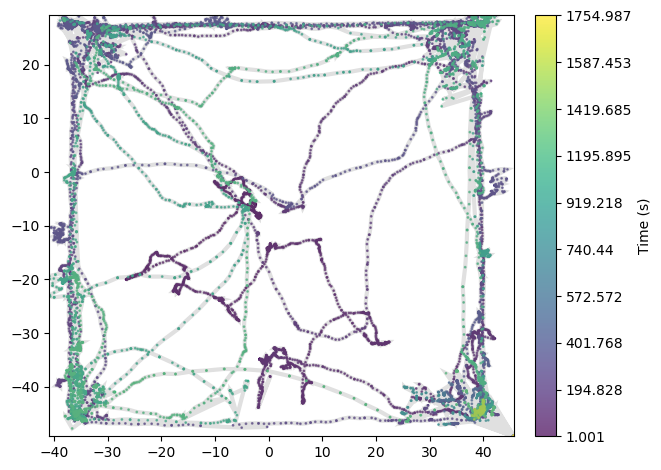

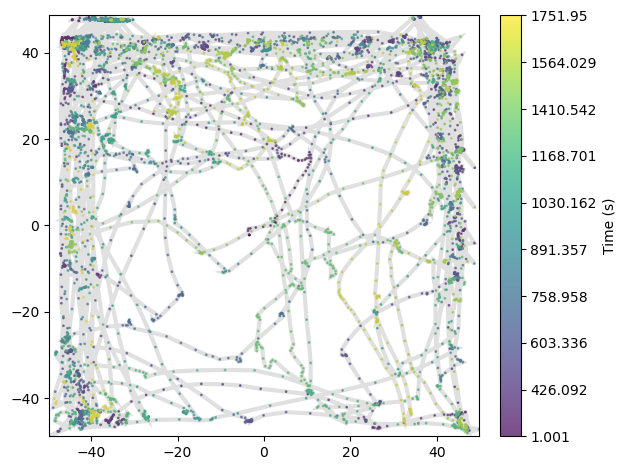

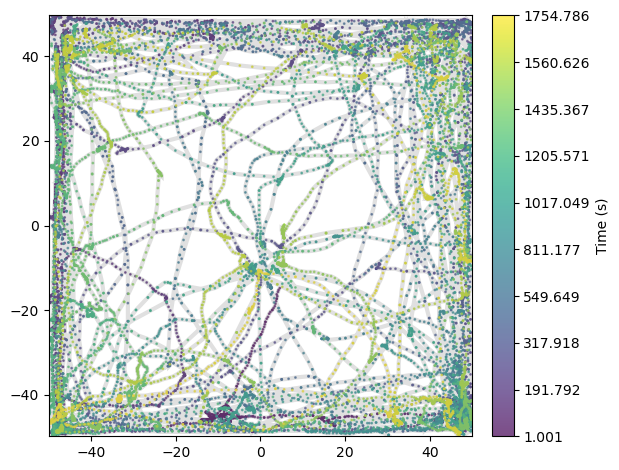

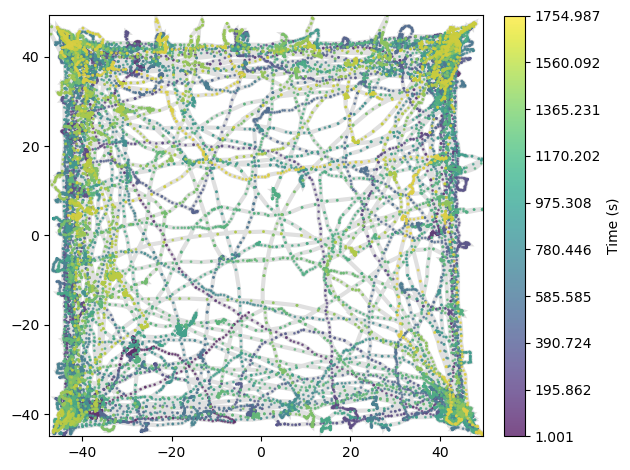

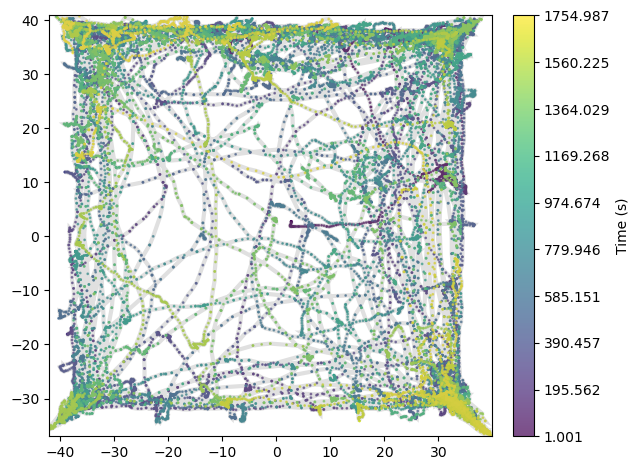

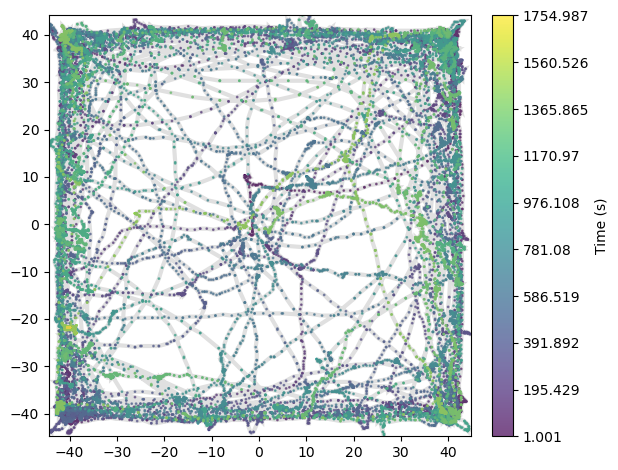

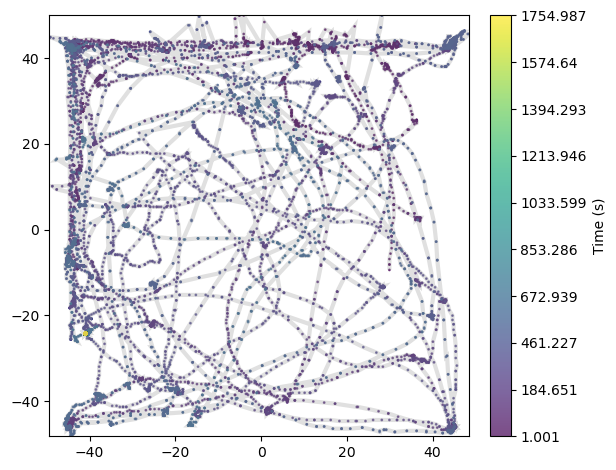

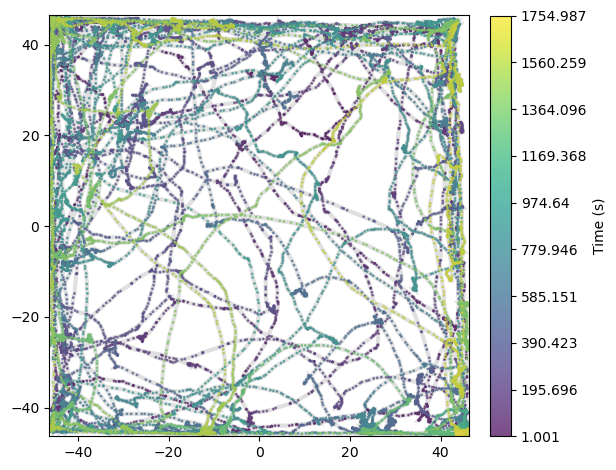

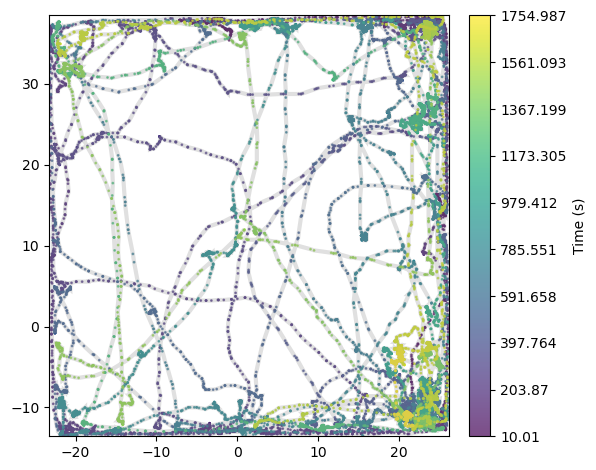

In [3]:
tr4, tr3, tr5, tr6, tr7 = openFile('Trace_4.txt'), openFile('Trace_3.txt'), openFile('Trace_5.txt'), openFile('Trace_6.txt'), openFile('Trace_7.txt')
tr91, tr92 = openFile('Trace_9.1.txt'), openFile('Trace_9.2.txt') 
tr1, tr2 = openFile('Trace_1.1.txt'), openFile('Trace_2.txt')
dfs = [tr4, tr3, tr5, tr6, tr7, tr91, tr92, tr1, tr2]
names = ['tr4','tr3','tr5','tr6','tr7', 'tr91','tr92', 'tr1', 'tr2']

### V (x) 

In [4]:
%matplotlib inline

In [5]:
def addRawV(df):
    vx = []
    vy = []
    v = []
    for i in range(len(df)):
        if i == 0:
            vx.append(0)
            vy.append(0)
            v.append(0)
        else:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            dt = df['time'][i]-df['time'][i-1]
            vvx = dx/dt
            vvy = dy/dt
            vv = pow(pow(vvx, 2) + pow(vvy, 2), 0.5)
            vx.append(vvx)
            vy.append(vvy)
            v.append(vv)
    df.insert(3, "Vx", vx)
    df.insert(4, "Vy", vy)
    df.insert(5, "V", v)
    return(df)

           time       x       y
0         1.001  -3.355  -5.324
1         1.034  -3.355  -5.324
2         1.068  -3.355  -5.324
3         1.101  -3.355  -5.324
4         1.134  -3.282  -5.324
...         ...     ...     ...
45184  1754.853  45.655 -49.228
45185  1754.886  45.655 -49.228
45186  1754.920  45.655 -49.228
45187  1754.953  45.655 -49.228
45188  1754.987  45.655 -49.228

[45189 rows x 3 columns] raw
           time       x       y
0         1.001  -3.355  -5.324
1         1.034  -3.355  -5.324
2         1.068  -3.355  -5.324
3         1.101  -3.355  -5.324
4         1.134  -3.282  -5.324
...         ...     ...     ...
45184  1754.853  45.655 -49.228
45185  1754.886  45.655 -49.228
45186  1754.920  45.655 -49.228
45187  1754.953  45.655 -49.228
45188  1754.987  45.655 -49.228

[45189 rows x 3 columns] filtered
          time       x      y
0        1.001  -3.409 -2.178
1        1.134  -3.409 -2.178
2        1.268  -3.409 -2.178
3        1.401  -3.693 -1.231
4        1.535  -

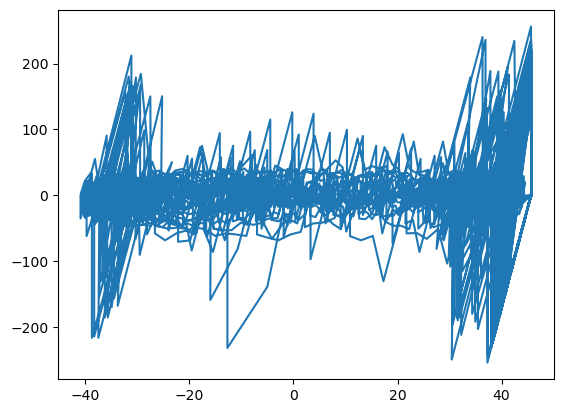

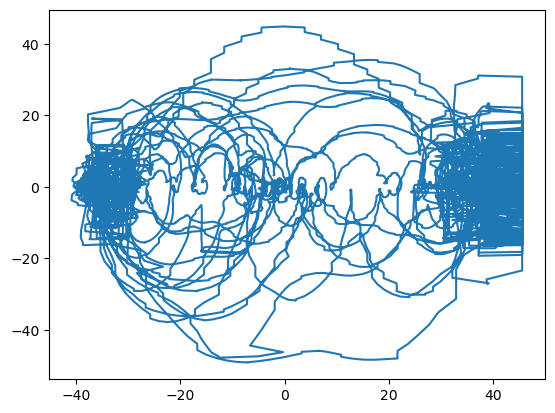

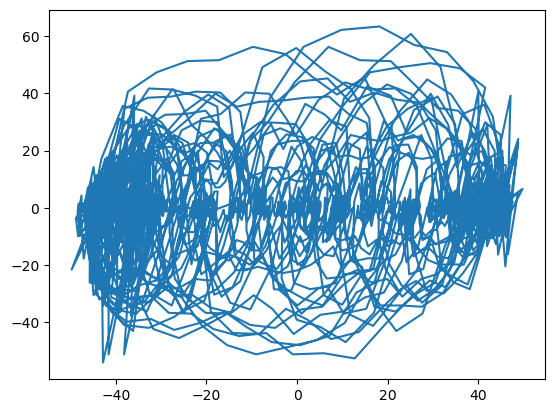

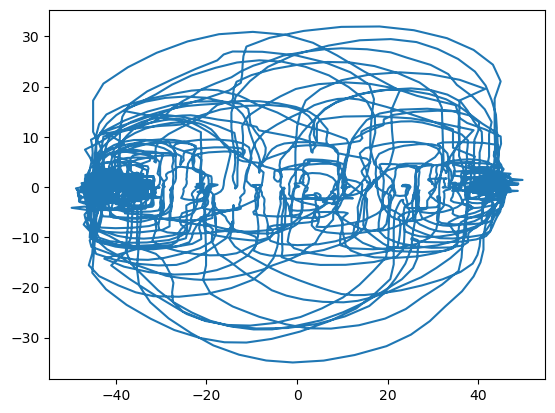

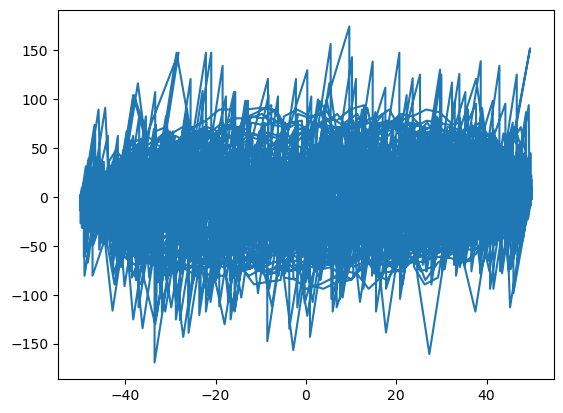

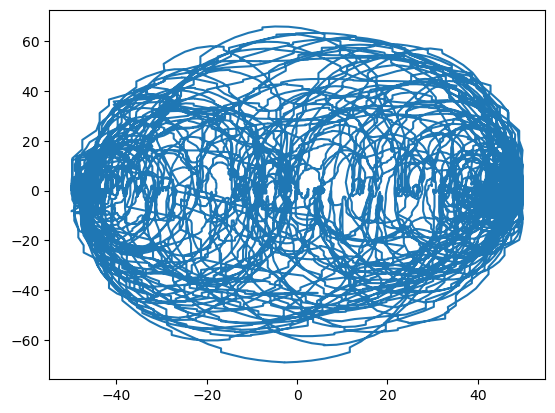

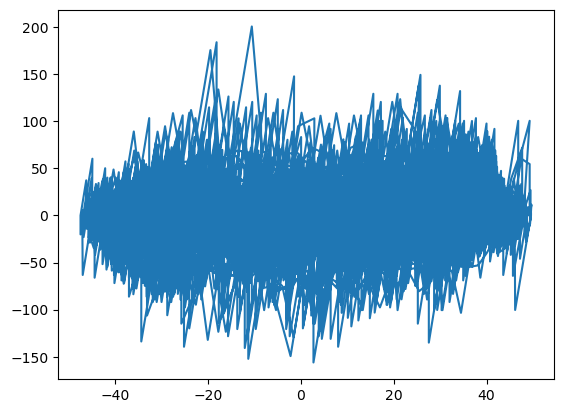

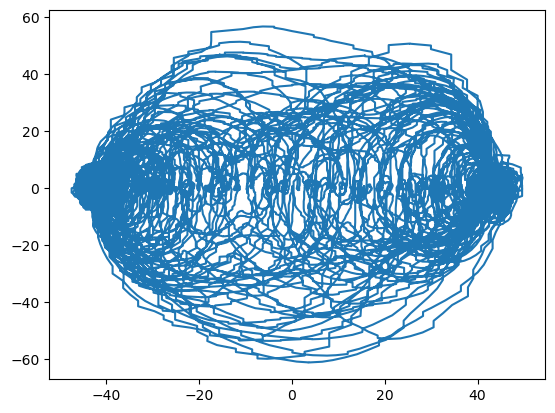

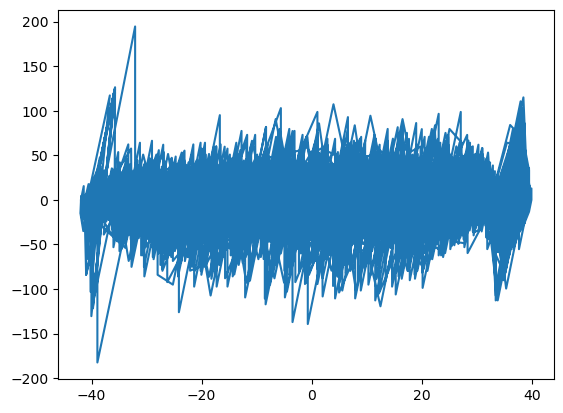

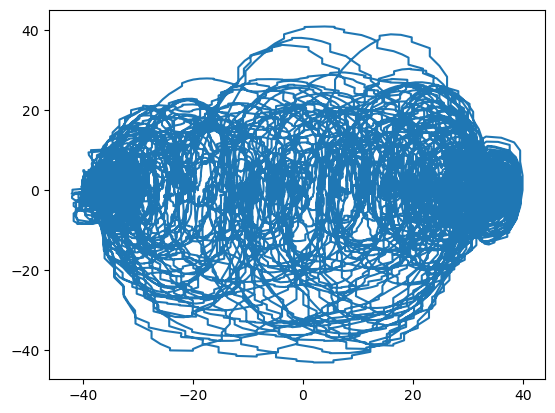

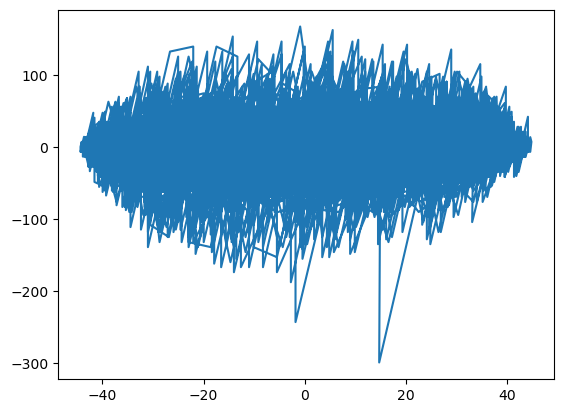

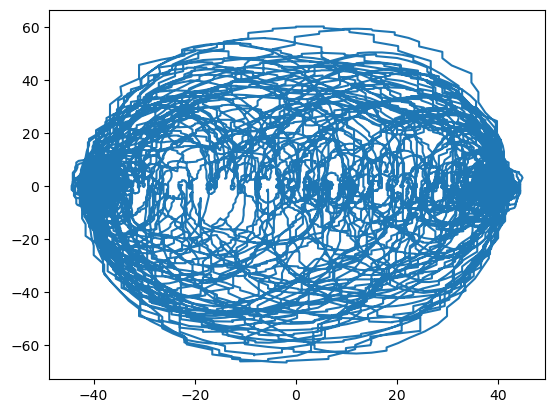

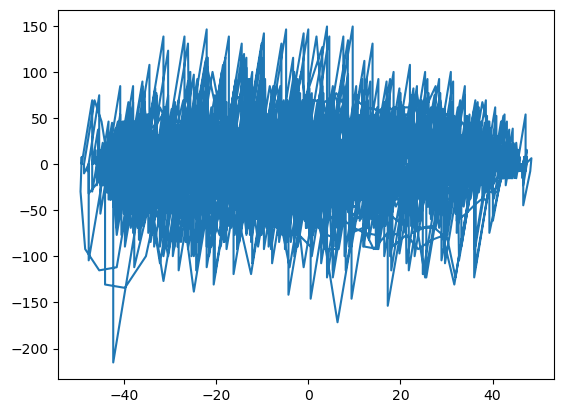

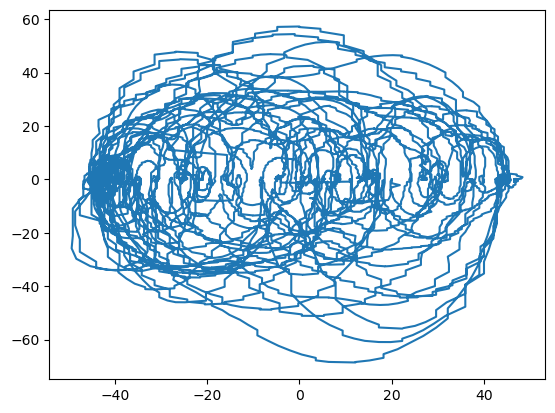

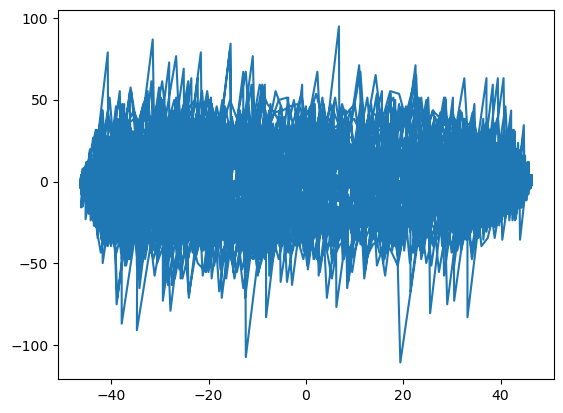

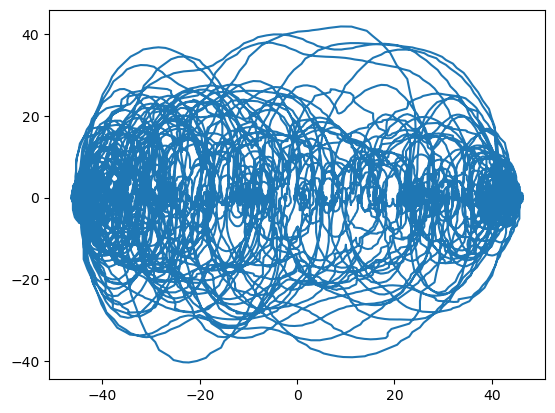

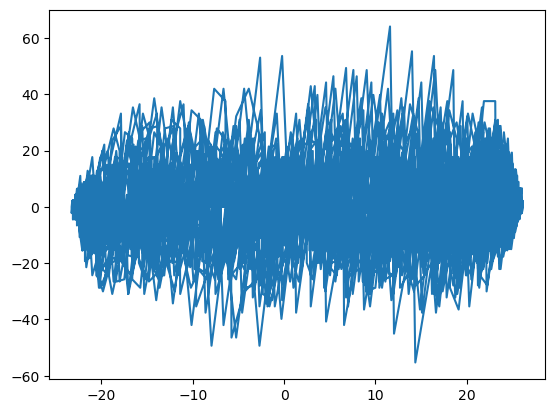

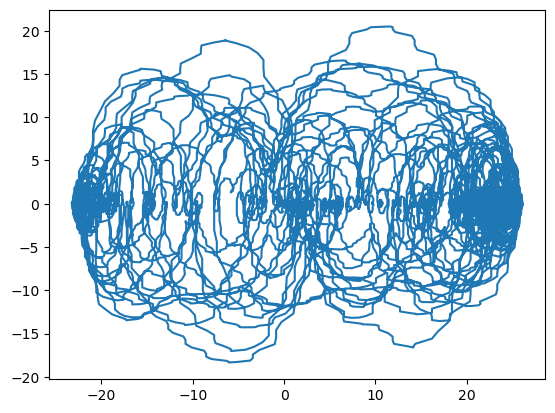

In [6]:
for i in dfs:
    ii = i.copy()
    iii = i.copy()
    dfraw = addRawV(ii)
    dffilt = addFilteredV(iii)
    print(str(i), "raw")
    plt.figure()
    plt.plot(dfraw['x'], dfraw['Vx'])
    print(str(i), "filtered")
    plt.figure()
    plt.plot(dffilt['x'], dffilt['Vx'])

In [7]:
from mpl_toolkits import mplot3d
%matplotlib
import numpy as np
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


In [8]:
df = openFile('Trace_7.txt')
df = addFilteredV(df)

In [9]:
df

time       x       y        Vx        Vy         V
0         1.001   2.771   2.771 -0.100444 -1.020664  1.060714
1         1.034   2.771   2.771 -0.110447 -1.061949  1.109922
2         1.068   2.771   2.771 -0.128983 -1.140741  1.205239
3         1.101   2.771   2.698 -0.153073 -1.249830  1.340646
4         1.134   2.771   2.626 -0.178118 -1.378875  1.507519
...         ...     ...     ...       ...       ...       ...
52480  1754.853 -37.997  35.226  3.840858 -7.165181  8.685303
52481  1754.886 -37.705  34.715  3.846060 -7.519928  8.991229
52482  1754.920 -37.705  34.715  3.826322 -7.821590  9.241747
52483  1754.953 -37.632  34.205  3.800186 -8.040699  9.418891
52484  1754.987 -37.632  33.913  3.782784 -8.155799  9.510554

[52485 rows x 6 columns]

In [10]:
ax = plt.axes(projection='3d')

ax.scatter3D(df['x'], df['y'], df['V'], c=df['V'], cmap='Greens');

### добавляем фильтрованную скорость

### теперь построим для всех мышей НЕФИЛЬТРОВАННЫЕ векторные поля скорости

In [11]:
tr4, tr3, tr5, tr6, tr7 = openFile('Trace_4.txt'), openFile('Trace_3.txt'), openFile('Trace_5.txt'), openFile('Trace_6.txt'), openFile('Trace_7.txt')
tr91, tr92 = openFile('Trace_9.1.txt'), openFile('Trace_9.2.txt') 
tr1, tr2 = openFile('Trace_1.1.txt'), openFile('Trace_2.txt')

In [12]:
dfs = [tr4, tr3, tr5, tr6, tr7, tr91, tr92, tr1, tr2]
names = ['tr4','tr3','tr5','tr6','tr7', 'tr91','tr92', 'tr1', 'tr2']

In [13]:
for i in dfs:
    i = addFilteredV(i)

In [14]:
n=10
df = dfs[3]
name = names[3]
if True:
    ind = range(0, len(df))
    df = df.reindex(ind)   
    binx = np.linspace(df["x"].min() - 0.1, df["x"].max() + 0.1, n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    biny = np.linspace(df["y"].min(), df["y"].max(), n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).mean()
    dfvx = pd.DataFrame(dfn.loc[:, 'Vx'])
    dfvx = dfvx.unstack()
    #print(dfvx)
    dfvy = pd.DataFrame(dfn.loc[:, 'Vy'])
    dfvy = dfvy.unstack()
    forVect = []
    for i in range(n):
        kk = []
        for j in range(n):
            kk.append([binx[i],biny[j],dfvx.iloc[i][j],dfvy.iloc[i][j]])
        forVect.append(kk)
    Vectors = np.array(forVect)
    print(Vectors.shape)
    plt.figure(figsize=(12,12))
    fig, ax = plt.subplots(figsize=(6, 6))
    for i in Vectors:
        for j in i:
            l = pow((pow(j[2], 2) + pow(j[3], 2)), 0.5)
            print(j[2], j[3], l)
            #plt.quiver(j[0], j[1], j[2], j[3], color='darkmagenta', units='xy', scale=l/3.5, width=0.3)
            plt.quiver(j[0], j[1], j[2], j[3], color='darkmagenta', units='xy', width=0.3)
    # Show plot with grid
    #plt.grid()
    plt.title("Vector field of V, " + name)
    plt.savefig('C:\\Users\\Lenovo\\1navigation\\vectFields\\' + name + 'NewVelocityField.png')
    plt.show()

(10, 10, 4)
-0.09378817577746373 0.17288789993453213 0.1966887080120189
-0.684141828566522 1.750324914611485 1.8792784115995282
-0.20219120655738188 1.8053490891102464 1.8166360718537784
0.12499179870989408 2.4561011698822823 2.459279550283345
0.3221938415506624 2.59442904110265 2.6143586060160127
-0.22561297172852238 1.0678593928144593 1.0914324971496134
-0.40271289807907873 2.9617959813333705 2.989048864324863
-0.13422609308435982 2.8446513869949768 2.847816384108557
0.8844087808875118 0.7845528622715463 1.182244511685045
0.03318192408545946 0.04797514715420872 0.058332279489843146
-1.3704127381043096 -0.6480229018722081 1.5159039396048248
-2.309872680061901 -0.9605968495399146 2.5016510758781605
-2.187184686979101 1.1230106574264325 2.4586438928094516
-0.024435600199794037 0.25429854354565473 0.2554698569431733
4.15605335081723 2.8687261808443787 5.049987064884533
-4.243389496216492 1.3130771497219325 4.4419056741135705
0.33519915908474973 -2.4073330152198595 2.4305576978172443
1.45

In [15]:
n=10
def buildVectorField(df, name):
    ind = range(0, len(df))
    df = df.reindex(ind)   
    binx = np.linspace(df["x"].min() - 0.1, df["x"].max() + 0.1, n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    biny = np.linspace(df["y"].min(), df["y"].max(), n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).mean()
    dfvx = pd.DataFrame(dfn.loc[:, 'Vx'])
    dfvx = dfvx.unstack()
    #print(dfvx)
    dfvy = pd.DataFrame(dfn.loc[:, 'Vy'])
    dfvy = dfvy.unstack()
    forVect = []
    for i in range(n):
        kk = []
        for j in range(n):
            kk.append([binx[i],biny[j],dfvx.iloc[i][j],dfvy.iloc[i][j]])
        forVect.append(kk)
    Vectors = np.array(forVect)
    print(Vectors.shape)
    plt.figure()
    for i in Vectors:
        for j in i:
            l = pow((pow(j[2], 2) + pow(j[3], 2)), 0.5)
            print(j[2], j[3], l)
            plt.quiver(j[0], j[1], j[2], j[3], color='darkmagenta', units='xy', scale=l/3.5, width=0.3)
    # Show plot with grid
    #plt.grid()
    plt.title("Vector field of V, " + name)
    plt.savefig('C:\\Users\\Lenovo\\1navigation\\vectFields\\' + name + 'NewVelocityField.png')
    plt.show()

In [16]:
for i in range(len(dfs)):
    buildVectorField(dfs[i], names[i])

(10, 10, 4)
-0.6994639088595452 0.21965177347839648 0.7331416380136099
0.013844979751272128 0.4074216715103259 0.40765684328928053
0.04740792649243718 0.5243178107356867 0.526456720109997
-0.6051341446081024 1.0972220165824944 1.2530297229690666
-0.577705163175365 3.119794888989447 3.172832079534647
0.39391964705604343 9.712887814295735 9.720872511324863
-1.0464308313071056 3.668652934786092 3.8149746841394223
1.9825746378070481 10.246611476281425 10.436649315768829
0.01650941930867754 3.6133097195748967 3.61334743561982
-0.16407460281307448 0.22789510729425458 0.28081427174723145
-6.370037564254518 -0.1547480836257159 6.3719169438560215
1.7484511239855307 0.7012644381292223 1.883839999880818
4.179466973851879 11.928581512847066 12.639580732530465
-4.859017575610183 0.5932725634221434 4.895102055585577
nan nan nan
nan nan nan
-4.260040986894206 -10.595564120225987 11.419891778639535
9.189767881745517 -11.618100159073345 14.813240193375032
-0.30215489242120147 -0.8029367657651822 0.8579

(10, 10, 4)
-0.5796617239831576 0.07465113311166825 0.5844488907731645
-0.6321306440321256 2.1853156526023008 2.2749051964055753
0.22798660254010306 1.3142740762992393 1.3339018849113293
0.4646814224678779 1.1122075271124634 1.2053772885501002
-1.0037142199738487 2.5118405794091614 2.7049556986657404
-0.2583472602758568 2.747053274872368 2.7591746957884062
0.04853607592806645 1.9132142763439046 1.9138298299150385
-0.8004519845370713 2.2125730428542325 2.352913693596638
-0.7431569308706439 1.5937697908508062 1.7585176627289525
0.6421289967304095 1.3009319924861946 1.4507769289301862
-0.9603628193005009 -0.05566965205893626 0.9619749762104883
0.8388931508503348 -2.6632783681162446 2.792273873498001
0.7693002354618429 0.14168695624243227 0.7822391231911708
-2.6723542319407962 1.3205898931874471 2.980844646565922
-1.8506501981997807 2.0185023337245473 2.738477282605852
-3.2225098584106617 -1.8707643072969216 3.7261681230199524
-1.1889952151979795 0.4537951243409087 1.2726506341644868
-0.50

0.5431754215101918 -0.3640951094575519 0.6539149694445611
0.03103136298297148 -0.16027274221022986 0.16324918800461988
(10, 10, 4)
-0.44895635851806764 0.05920490473084595 0.45284327597745366
0.06591713919409595 2.39077301937237 2.391681563126332
-0.20022195941652138 6.619027208981502 6.622054819032386
1.0524648737706408 13.60541643483646 13.646063120029861
0.3014831408962784 3.4534147275768743 3.466549489750513
-1.6046466126329963 8.088728873854887 8.246358320262848
-0.1998554477802549 2.9849271739022316 2.99161034118874
0.5406095626931903 3.424380026521116 3.4667906289985386
-0.2144061262318399 2.2429724363604984 2.2531966929761578
0.06763805658326898 0.16755184070029117 0.18068903126758204
-5.238662331985242 -0.5765030171985477 5.270288299267895
0.9994762638918828 0.5936376701120847 1.162479455930031
-0.08537940555359433 -3.9894641057489664 3.990377612952449
1.9608880227221586 -3.814184842907028 4.288716340994928
3.2624451936264114 1.252901050236309 3.4947545955473496
-2.19165658388

(10, 10, 4)
0.01708127814523603 -0.333041301917058 0.333479053083824
nan nan nan
0.0054930703159005384 -0.014492044116322959 0.015498166477518512
1.0763149789706201 -5.036368274062211 5.15009313759828
0.25600482020346493 -5.629406312178817 5.635224387330652
-1.0450247128251684 -7.488685404930781 7.561248954004796
-0.24128145754084315 -3.531793408793829 3.5400256247875617
-0.8073701334949756 -1.7835729314914857 1.9577995133334838
-2.2346081958427897 0.005306541834637025 2.234614496577432
0.04240158928209698 -0.11113312596808533 0.11894732641419883
4.1273068984325905 -0.8442060827813247 4.212759920058849
-0.6156673371628407 -6.992373599728323 7.019425534060947
6.93785234839631 -14.31629975568821 15.908809946154568
6.931818666927457 -11.419473538326445 13.35868578579876
-3.7848433527850114 -6.10422949909154 7.182385187575242
-5.677896880938777 -0.9355384751299857 5.754454381522441
-1.9341056926570641 2.2265830878456887 2.9493112886653563
-13.724842907382797 0.9185874461577278 13.755548543

-4.401186428698128 6.421270164052343 7.784802662874981
0.3917053206485814 2.4959865178800413 2.5265355243224548
-7.74106601053477 7.306785239766994 10.644867942794477
-7.242892933444965 3.2547939224894424 7.940603347556231
1.9210468487872048 1.727409872863576 2.5834794104273033
3.065289456307116 -2.1353913477573174 3.735759047238511
-2.5763604802409876 -3.1842319695738697 4.095969550692956
4.170818827175851 -0.596973171737238 4.213324893347125
-0.8531916927816007 -1.2322868240517493 1.4988218310937027
-3.0078822648831967 2.391707453996861 3.8428661523533467
-2.632557922447753 -1.4159647666002095 2.989200133028168
-1.726097785755228 3.7698653247487095 4.146239034683335
-7.527336564292106 12.725170674139251 14.784815333243175
-3.0038553230762766 -1.5614399842241058 3.385445558018539
4.204481795039736 0.03887590496168689 4.204661520361317
2.4953398444263204 1.3370273068191767 2.83096502245466
-8.669789670722233 5.053877324427231 10.035284198512848
2.6062163279862873 -0.008657711741811758 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22936\3317512848.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


-0.066357014281691 -10.449269585602964 10.449480280183868
-3.5054904404463105 -5.479216315533878 6.504634859888225
-1.1527582377634376 0.8699190732810429 1.4441643773440802
-4.886974853456575 2.15901883996376 5.342647805127657
1.69640263696406 18.012873036305756 18.092577951435487
1.7566563302450355 17.406498416252717 17.494914363254207
5.826278283155584 10.434506814475268 11.950918420527403
0.037182205293209994 0.10750306001513216 0.11375159033210709
0.3091198132980927 -0.013597496895763323 0.3094187306794435
-0.14305228783970356 -5.495440528675401 5.49730211660814
-6.622042273559471 7.502601873820322 10.007021472439284
-6.402671622722766 9.515694871761653 11.46920454089517
2.6036138230999546 -6.426687304316805 6.934054704666236
-5.394517363711811 -12.666327158040364 13.767231430534578
-6.976839823709227 -7.917989888086741 10.553239208581358
nan nan nan
3.8826466527391355 4.090406579205175 5.639713735042887
1.6272910052354337 0.3958317607745209 1.67474141244492
0.3146640255637922 0.14

### вместо дыр усредненные вектора и новые карты:
#### 1) векторного поля
#### 2) углов

##### пока старое

In [20]:
#без gaussian filtering
def buildVectorFieldold(df,name,n):
    ind = range(0, len(df))
    df = df.reindex(ind)   
    binx = np.linspace(df["x"].min() - 0.1, df["x"].max() + 0.1, n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    biny = np.linspace(df["y"].min(), df["y"].max(), n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).mean()
    dfvx = pd.DataFrame(dfn.loc[:, 'Vx'])
    dfvx = dfvx.unstack()
    #print(dfvx)
    dfvy = pd.DataFrame(dfn.loc[:, 'Vy'])
    dfvy = dfvy.unstack()
    forVect = []
    for i in range(n):
        kk = []
        for j in range(n):
            #если пустая клетка
            if np.isnan(dfvx.iloc[i][j]) or np.isnan(dfvy.iloc[i][j]):
                aa=[]
                if i < n-2:
                    aa.append([dfvx.iloc[i+1][j],dfvy.iloc[i+1][j]])
                    if j < n-2:
                        aa.append([dfvx.iloc[i+1][j+1],dfvy.iloc[i+1][j+1]])
                    if j > 0:
                        aa.append([dfvx.iloc[i+1][j-1],dfvy.iloc[i+1][j-1]])
                if j < n-2:
                    aa.append([dfvx.iloc[i][j+1],dfvy.iloc[i][j+1]])
                    if i > 0:
                        aa.append([dfvx.iloc[i-1][j+1],dfvy.iloc[i-1][j+1]])
                if i > 0:
                    aa.append([dfvx.iloc[i-1][j],dfvy.iloc[i-1][j]])
                    if j > 0:
                        aa.append([dfvx.iloc[i-1][j-1],dfvy.iloc[i-1][j-1]])
                if j > 0:
                    aa.append([dfvx.iloc[i][j-1],dfvy.iloc[i][j-1]])
                aa = np.array(aa)
                aax = aa[:,0]
                aay = aa[:,1]
                aaxmean = np.nanmean(aax)
                aaymean = np.nanmean(aay)
                kk.append([binx[i],biny[j],aaxmean,aaymean])
                #print('aa',aa,'aastop',aa.shape)
                #print('aax',aax,'aastop',aax.shape,'mean',aaxmean) 
            #если все ок
            else:
                kk.append([binx[i],biny[j],dfvx.iloc[i][j],dfvy.iloc[i][j]])
        forVect.append(kk)
    Vectors = np.array(forVect)
    #print(Vectors.shape)
    plt.figure(figsize=(12,12))
    for i in Vectors:
        for j in i:
            l = pow((pow(j[2], 2) + pow(j[3], 2)), 0.5)
            #print(j[2], j[3], l)
            #plt.quiver(j[0], j[1], j[2], j[3], color='darkmagenta', units='xy',pivot='middle',scale=l/3.5, width=0.3)
            plt.quiver(j[0], j[1], j[2], j[3], color='darkmagenta', units='xy',pivot='middle',scale=0.27*(l**0.88),width=0.4)
            print(l)
    # Show plot with grid
    #plt.grid()
    plt.title("Vector field of V, " + name)
    #plt.savefig('C:\\Users\\Lenovo\\1navigation\\vectFields\\' + name + 'NewVelocityField.png')
    plt.show()
    

In [19]:
for i in range(len(dfs)):
    buildVectorField(dfs[i], names[i],10)
#можно в тр2 немного увеличить скейл

NameError: name 'buildVectorField' is not defined

### гауссово сглаживание

In [22]:
def buildVectorField(df,name,n):
    ind = range(0, len(df))
    df = df.reindex(ind)   
    binx = np.linspace(df["x"].min() - 0.1, df["x"].max() + 0.1, n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    biny = np.linspace(df["y"].min(), df["y"].max(), n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).mean()
    dfvx = pd.DataFrame(dfn.loc[:, 'Vx'])
    dfvx = dfvx.unstack()
    #print(dfvx)
    dfvy = pd.DataFrame(dfn.loc[:, 'Vy'])
    dfvy = dfvy.unstack()
    forVect = []
    for i in range(n):
        kk = []
        for j in range(n):
            #если пустая клетка
            if np.isnan(dfvx.iloc[i][j]) or np.isnan(dfvy.iloc[i][j]):
                aa=[]
                if i < n-2:
                    aa.append([dfvx.iloc[i+1][j],dfvy.iloc[i+1][j]])
                    if j < n-2:
                        aa.append([dfvx.iloc[i+1][j+1],dfvy.iloc[i+1][j+1]])
                    if j > 0:
                        aa.append([dfvx.iloc[i+1][j-1],dfvy.iloc[i+1][j-1]])
                if j < n-2:
                    aa.append([dfvx.iloc[i][j+1],dfvy.iloc[i][j+1]])
                    if i > 0:
                        aa.append([dfvx.iloc[i-1][j+1],dfvy.iloc[i-1][j+1]])
                if i > 0:
                    aa.append([dfvx.iloc[i-1][j],dfvy.iloc[i-1][j]])
                    if j > 0:
                        aa.append([dfvx.iloc[i-1][j-1],dfvy.iloc[i-1][j-1]])
                if j > 0:
                    aa.append([dfvx.iloc[i][j-1],dfvy.iloc[i][j-1]])
                aa = np.array(aa)
                aax = aa[:,0]
                aay = aa[:,1]
                aaxmean = np.nanmean(aax)
                aaymean = np.nanmean(aay)
                kk.append([binx[i],biny[j],aaxmean,aaymean])
                #print('aa',aa,'aastop',aa.shape)
                #print('aax',aax,'aastop',aax.shape,'mean',aaxmean) 
            #если все ок
            else:
                kk.append([binx[i],biny[j],dfvx.iloc[i][j],dfvy.iloc[i][j]])
        forVect.append(kk)
    Vectors = np.array(forVect)
    #print(Vectors.shape)
    plt.figure(figsize=(5,5))
    vectx = Vectors[:,:,2]
    vecty = Vectors[:,:,3]
    vectx = gaussian_filter(vectx, sigma=1)
    vecty = gaussian_filter(vecty, sigma=1)
    for i in range(n):
        for j in range(n):
            l = pow((pow(vectx[i][j], 2) + pow(vecty[i][j], 2)), 0.5)
            #print(j[2], j[3], l)
            #plt.quiver(j[0], j[1], j[2], j[3], color='darkmagenta', units='xy',pivot='middle',scale=l/3.5, width=0.3)
            plt.quiver(Vectors[i][j][0], Vectors[i][j][1], vectx[i][j], vecty[i][j], color='darkmagenta', units='xy',pivot='middle',scale=0.27*(l**0.88),width=0.4)
            print(l)
    # Show plot with grid
    #plt.grid()
    plt.title("Vector field of V, " + name)
    #plt.savefig('C:\\Users\\Lenovo\\1navigation\\vectFields\\filtered\\' + name + 'NewVelocityField.png')
    plt.show()
    

In [18]:
%matplotlib inline

In [19]:
#удобно все де показывать 2д нампи как таблицу
#сравним таблицу до и после филтрации при сигма 1
vectx = Vectors[:,:,2]
vecty = Vectors[:,:,3]

vectx1 = gaussian_filter(vectx, sigma=1)
kekdf1 = pd.DataFrame(vectx1)
kekdf1

0         1         2         3         4         5         6  \
0 -1.067377 -1.046181 -0.585776  0.234429  0.528582  0.037620 -0.041204   
1 -2.616702 -2.165174 -0.847765  1.030128  1.875426  1.045214  0.427681   
2 -4.716038 -3.613827 -0.858931  2.560668  4.184776  3.072874  1.272341   
3 -5.996587 -4.944318 -1.465231  2.952943  5.368358  4.553745  2.076293   
4 -6.659922 -6.228075 -3.230732  0.984381  4.173420  4.239261  2.225857   
5 -6.898234 -6.968768 -4.475662 -0.911736  2.132979  2.498772  1.041058   
6 -6.522902 -7.149020 -4.730034 -1.188902  1.213483  1.334611 -0.370858   
7 -5.526122 -6.027327 -3.674620 -0.396070  1.538384  1.548449 -0.578557   
8 -3.621520 -3.394256 -1.378037  0.965694  2.107516  1.899385  0.152540   
9 -1.650570 -1.012147  0.437291  1.738506  2.104839  1.724894  0.661392   

          7         8         9  
0  0.513577  0.776676  0.368411  
1  0.969655  1.322890  0.571074  
2  1.319164  2.053438  1.146183  
3  1.693102  3.035698  2.293715  
4  2.016018  3.801040  3.551136  
5  1.111625  3.360124  4.235120  
6 -0.794515  1.925786  4.117384  
7 -1.820084  0.561646  3.082045  
8 -1.110600  0.143920  1.813206  
9 -0.132383  0.238207  0.905233

In [20]:
kekdf = pd.DataFrame(vectx)
kekdf

0          1         2          3         4         5         6  \
0 -0.093788  -0.684142 -0.202191   0.124992  0.322194 -0.225613 -0.402713   
1 -1.370413  -2.309873 -2.187185  -0.024436  4.156053 -4.243389  0.335199   
2 -7.259292  -5.056058 -1.836757   2.984526  8.111526  5.361001 -1.145520   
3 -6.085863  -6.426642 -0.414771  11.208431  6.735218  8.273278 -0.239846   
4 -4.561972 -12.048895 -6.106241  -0.369725  7.986035  7.320435  5.184650   
5 -6.735773 -11.253080  3.854863 -12.558597  9.225156 -0.289959  0.698182   
6 -2.614777 -14.834896 -7.015058   4.024309  0.690060  0.084028  0.271338   
7 -3.046947 -14.059955 -1.773370  -3.515350  1.782179  5.395817 -0.040278   
8 -4.163503  -5.306568 -1.650783   5.339659  2.730370  4.124345  1.258118   
9 -0.498360   0.791021  1.811648   2.257022  1.440297  1.700769  0.442148   

           7          8         9  
0  -0.134226   0.884409  0.033182  
1   1.456815   3.794100 -1.132400  
2   0.757176   5.136055 -1.349515  
3  -5.158431  10.545328 -1.309139  
4  -4.301623  14.098228  0.731163  
5  -0.556665   6.893123  3.088457  
6  -7.200799   4.981620  6.846353  
7 -12.538581   2.977954  3.783010  
8  -3.341082  -0.472795  3.678253  
9   0.316635   0.543175  0.031031

1.8281373032965962
0.8728479255707391
1.4515669367181385
1.8826922799590844
2.506876524588806
2.699069888519158
1.9399658331565692
2.1473037156496484
1.9970323006267545
1.1677195251439574
4.037021667008352
1.1720977432532214
0.5287450176260159
1.134600394046482
0.512138786101366
0.820302594090584
1.8677617977127845
0.9353280625478596
0.6021782823398938
0.9532367755526275
6.720519919571569
3.9046065225587534
3.7013462611200065
3.2779644915982704
2.7632078744768047
3.056631947759925
3.427350812307681
2.3385419590777587
0.6846964146488611
0.8950209568315562
7.2844559773082525
4.6301986664919985
4.144204446002834
3.797047857379906
3.744213051691387
3.2196086972205764
3.2874586573942763
2.9622146574355313
1.2585210785890149
1.8716301149282537
5.5552185469994475
3.230926387888021
2.709160168575609
2.7618136408610052
3.4460944448667385
4.019447248495616
4.854060916925738
4.478848937176054
2.5970773614670315
3.371050738139176
3.394233461243611
2.5226564447929762
2.916068702631778
4.32294443327

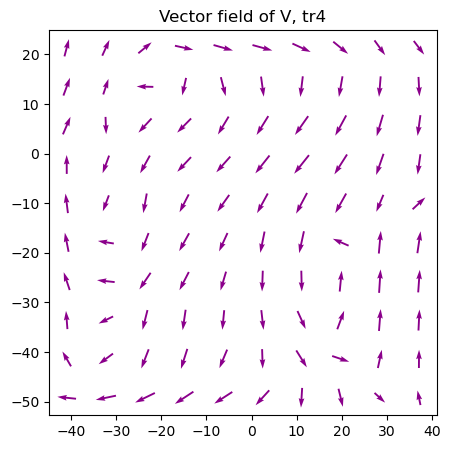

1.2806120875017215
2.100860466474526
2.6633296940737883
2.5152861912515196
1.5284707217395823
0.7670266133425399
0.690887464002778
0.6233469542194747
0.32194410632652937
0.08606488497038617
2.1876488262800247
3.7120569006458326
3.666734397086584
2.1537991349978385
1.1200460250220188
1.1512241692451621
1.0492322668178617
0.6499621692102912
0.4563623239069337
0.36071477625261134
3.4002985491097
6.157531099087383
5.83762393595264
3.350940558178984
1.3815941915153986
1.7993517754790684
2.1911242890235423
1.6555583203907573
1.1614026352837488
0.8791568575225035
3.624691795703729
7.1687622071864965
7.46426316528291
5.540521710903749
3.4499063705322373
3.4295696863396152
3.4532595497105643
2.6285099236818867
1.7614147195472698
1.1628318626905385
1.6829623941743088
5.161168265334156
6.64412233386783
5.966282685418934
4.395040252082201
3.844616304608466
2.8847978864464827
2.0640894002983647
1.6872020694696708
1.0897820949236714
1.455323853442337
2.2689392777570987
4.904533247277407
4.8320434600

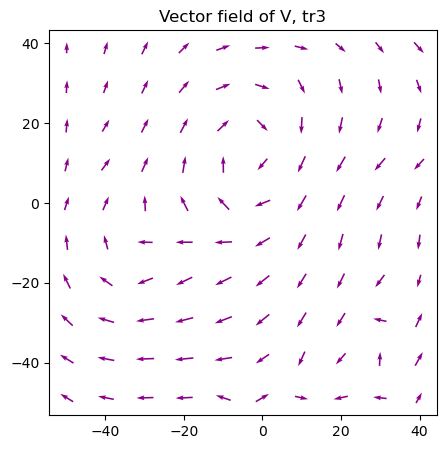

0.6518206349943929
0.5426571459183704
0.7699091838103834
1.0861461002737418
1.391165041479786
1.1536019076792592
1.1397644703209513
1.4180603410645485
1.0847307426959751
0.9317262789843758
0.9267177434719792
0.13641325018371836
0.4118133537500033
1.7531316490105038
3.51498588853744
3.124815641602295
2.041285451268805
1.8441303000917402
1.0380358736804858
1.223207397495104
1.3687854476595083
0.5627917054974408
1.5527633792875226
4.553439811955417
8.740715010704132
8.403373004071621
5.884326614480748
3.759870582344862
1.6952059524101124
1.8960228021570629
1.2141925285730009
0.8138531819618127
1.8736402906107845
4.888841206742375
9.699286293541327
10.12790547511107
8.188112100396456
5.967286960964776
3.4463517592059887
2.0275518026679458
1.1159671757399534
0.6668319949717897
1.9094194171389571
2.684881251862943
5.018732736568906
6.059115634039858
6.428384078837585
6.087685780839883
4.499593294343541
2.1056478215232746
1.687416032371713
1.1556340442991684
2.635387852443078
2.98880536806845

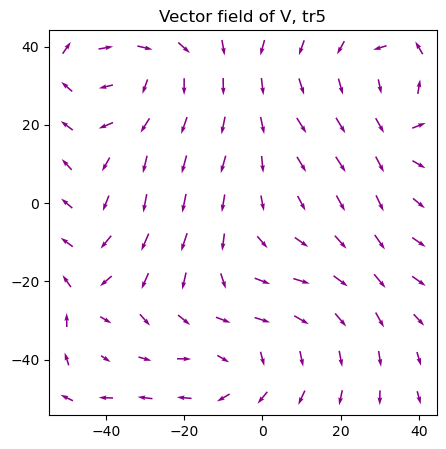

1.1175677736232903
1.3256864118465896
1.4798438705238919
1.6860164603872083
1.6664924602764128
1.217690767389565
0.9990199775921716
0.9868695403707108
0.9426299623025279
0.47490080006772445
2.6195105330123356
2.210076864414071
1.1885278452882497
1.3269944644873344
1.905165306885767
1.0590209594728421
0.6732056492637493
1.0677445458142298
1.324832559094554
0.5976358353543915
4.717062951705933
3.62183860111447
0.9191551753732388
2.5609862487373762
4.2114899036760125
3.1201331867951447
1.479765461474965
1.4852204000075346
2.05861363887109
1.1605286708422362
5.996590505420871
4.944613403740713
1.4994103210965768
2.9578420609066196
5.44365474740924
5.004051258318142
2.757974437089291
2.0820539961041136
3.1610197976850514
2.3634530556194786
6.664028602018535
6.247840791110898
3.3861196989788866
1.1100257102432107
4.476219585504447
5.5471875338322825
4.203522722455442
3.4969188791068815
4.3045923742477985
3.7375683797047485
6.916548710430592
6.996481918060246
4.542727193018094
1.0635397133784

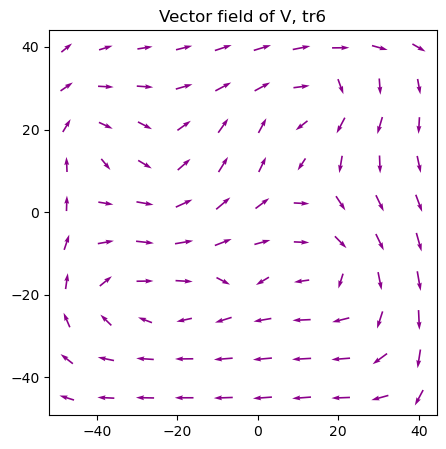

1.393306655354168
1.8749823311641767
3.6255790000168266
4.740929749879322
4.354155801254298
3.5187735863093357
2.342073248514655
1.5264624944253185
1.0237150935136636
0.5528978373548564
2.1004342537940848
0.7479803718988699
1.3467527412517177
1.97971260508105
2.356350817664833
2.4671338176678748
1.5841509047892282
0.8018337543113682
0.41877346739482946
0.23548375427950852
2.821002362202903
0.743122703442675
1.5132470031796537
1.9933633755512554
1.9380521023110038
2.8254449732607143
2.2825271262491613
1.3727760296095228
0.7126435091634831
0.4092778926656151
3.4840783558117474
1.937143639612509
1.3126276309213387
1.4081518305320357
1.1789274020767573
1.9437180212527116
1.8829216643174713
1.629982857848385
1.2621538134461467
0.7816985232349895
4.3848714382078535
3.0249434239884
2.530901922942368
1.5854281957596965
1.156395980142566
1.2952759332125303
1.3616309890910077
0.2330582877199084
0.6843978853443736
0.7608460172013474
4.709433345304867
2.8343123376947594
2.0163010820735647
1.521752

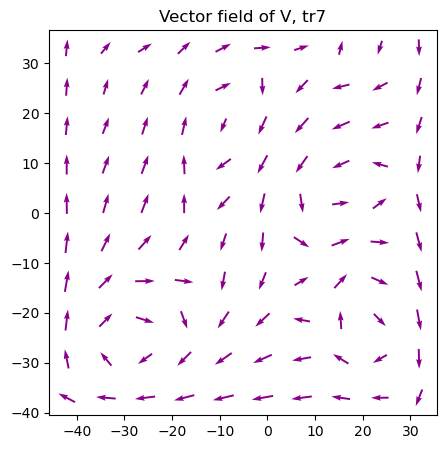

3.290011591746127
3.806347204853571
4.916268742888677
5.861856384500376
5.464195761427784
5.417386202274098
5.71713723614057
5.867655680372363
4.984877914408697
3.758128217238561
6.598649664147902
7.553473182042274
9.170653840548542
9.088916709231187
6.2066118103751
1.7673241385668683
2.532124189511749
4.9549368806319505
6.001303326047501
6.46692745274521
9.885475502133446
11.884918620662111
14.037485547260832
12.404677103423618
7.554417196445532
3.410338380318072
5.673459548153258
7.2192831786902865
9.153956497148283
11.214926635809292
10.327435147975883
12.514804218048926
13.635496312666374
10.61273313716831
5.975008232947961
3.8261443866601743
6.240913086819298
8.103834176555456
11.558278809670835
14.709753956235216
9.92757528496139
11.463000446028781
11.015280505826427
7.142888306983901
3.6444871845871813
3.4717302588974364
5.807159355458399
8.62051375625628
12.530631098781834
14.746211049898614
9.974698746769876
11.731402057696455
11.147650556017016
6.8385618618503985
3.4417831630

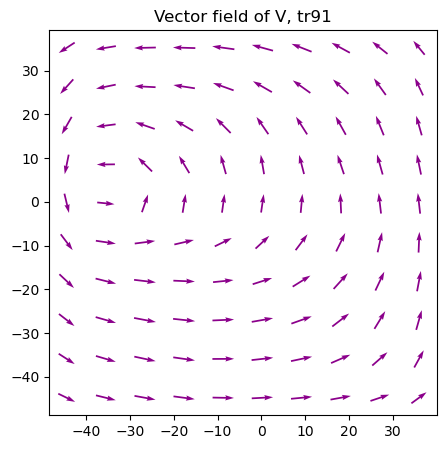

2.637572837818093
4.045496469530174
5.365974111698796
5.879572200982634
5.753349547466573
5.132056833168073
3.949857555625876
3.344128252853289
2.2677441234638924
0.7846660643336416
3.824067001459422
5.02497460412278
6.390475555702353
5.885366625108459
5.933313305919462
6.931684965735634
6.421315019501168
5.271813642362149
3.0834448904475393
1.139125318714215
6.138799694727857
6.175585594239954
5.8554919483668835
2.1648294854778767
5.116789087826851
9.78013840109115
9.666401548677412
6.440272196130181
3.209365547277106
1.9571703113620154
10.046883226713033
8.669180758661444
7.650792788195743
7.143994046090636
7.1571406232199095
10.254022464892374
10.409074714227376
5.868227593675974
2.8106616156718176
2.6648732988124744
13.017857581600667
10.114188013099032
9.528071008584524
11.896996813027025
11.26806395165368
9.73763105428257
8.289526405300977
4.244124884279418
2.5825556813128325
3.8170411587431494
12.542321253758823
10.794165238585567
10.858163745209515
11.36669080066412
9.308080184

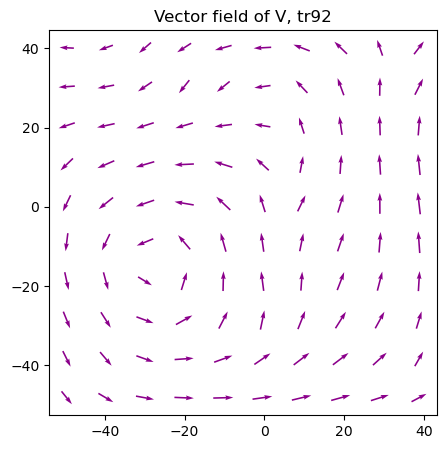

0.6636968744161515
1.1122623712393882
0.30560382599319386
1.5560810678152066
0.6008431166292816
1.3033640263108917
1.4587407566481037
1.8231796657883952
1.9756508940553705
1.4409986975366373
1.0464334793223355
2.4671783234441405
2.5418553686148035
3.059623452230904
2.1443677499028957
3.1774857605972238
2.47173067746885
1.9626493906118543
2.135216283577677
1.990171464186118
2.038023388931472
4.529325464032509
5.730734171160911
4.843596837855195
4.387839668956518
5.499619180368324
4.559775111260339
2.589624171429487
0.7985269207453244
1.9255327756817289
2.006469350423351
5.451359042501798
8.655850166298938
8.019741707248064
6.995698625829395
6.732297725790448
5.922847818476516
4.455630769880662
1.6394497080703334
1.525575204898542
1.303400659698694
4.374659494130212
8.182827987926794
9.206070790985098
9.109464604950592
7.33098951025818
4.699844068469612
3.885680383818135
2.308095637512974
1.5974029154056766
1.1803079664675613
2.771217558788249
5.363863576809975
7.3549229222089405
8.45072

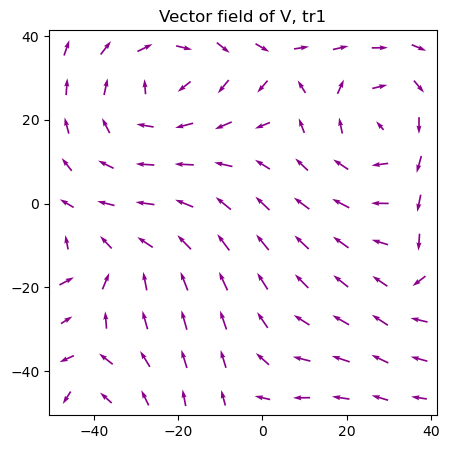

0.47185957242139126
1.2173879386690638
2.2007110743333285
3.0730459698299475
3.928883139720287
4.08885904717158
2.8346449817647414
1.2573116640173811
0.5955129062619157
0.19114136251552702
0.92818265515397
1.8631165632115252
3.369213119737957
5.838243061289481
8.744991550074987
8.704772566962815
5.388225942019844
1.8559989509859092
0.6262603508054266
0.17786565216067213
0.6667509874117735
0.6571767810028715
1.4228940170588422
4.885470851909515
8.976916627094583
8.1819021219312
3.9876058119284155
0.8765420657481396
0.7516697886683844
0.6000157019903749
0.3095674623356552
1.4668889474501088
1.9533844598824897
0.7314243771082132
3.5568229726231175
3.165844760721711
3.4444130163991473
3.1460632387602776
1.8386976319665271
1.2615724357102915
0.7203179981266842
1.6691991313713863
2.1669495436762185
1.5942130802628862
1.3862440616666782
2.9266718384554453
5.736023796233974
5.922202690433564
3.845573757537345
2.020949578216642
0.689464692069509
1.4426572064790257
1.9756589760340506
1.993174169

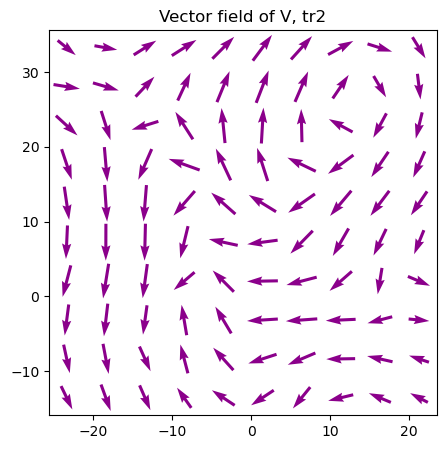

In [23]:
for i in range(len(dfs)):
    buildVectorField(dfs[i], names[i],10)

In [74]:
%matplotlib inline

### новые интуитивно понятные углы! пишу второй раз....
#### рабочий вариант turnsMapTry

In [27]:
#n=10
#df = dfs[3]
#name = names[3]
def turnsMapTry(df,name,n):
    ind = range(0, len(df))
    df = df.reindex(ind)   
    binx = np.linspace(df["x"].min() - 0.1, df["x"].max() + 0.1, n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    biny = np.linspace(df["y"].min(), df["y"].max(), n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).mean()
    dfvx = pd.DataFrame(dfn.loc[:, 'Vx'])
    dfvx = dfvx.unstack()
    #print(dfvx)
    dfvy = pd.DataFrame(dfn.loc[:, 'Vy'])
    dfvy = dfvy.unstack()
    forVect = []
    for i in range(n):
        kk = []
        for j in range(n):
            #если пустая клетка
            if np.isnan(dfvx.iloc[i][j]) or np.isnan(dfvy.iloc[i][j]):
                aa=[]
                if i < n-2:
                    aa.append([dfvx.iloc[i+1][j],dfvy.iloc[i+1][j]])
                    if j < n-2:
                        aa.append([dfvx.iloc[i+1][j+1],dfvy.iloc[i+1][j+1]])
                    if j > 0:
                        aa.append([dfvx.iloc[i+1][j-1],dfvy.iloc[i+1][j-1]])
                if j < n-2:
                    aa.append([dfvx.iloc[i][j+1],dfvy.iloc[i][j+1]])
                    if i > 0:
                        aa.append([dfvx.iloc[i-1][j+1],dfvy.iloc[i-1][j+1]])
                if i > 0:
                    aa.append([dfvx.iloc[i-1][j],dfvy.iloc[i-1][j]])
                    if j > 0:
                        aa.append([dfvx.iloc[i-1][j-1],dfvy.iloc[i-1][j-1]])
                if j > 0:
                    aa.append([dfvx.iloc[i][j-1],dfvy.iloc[i][j-1]])
                aa = np.array(aa)
                aax = aa[:,0]
                aay = aa[:,1]
                aaxmean = np.nanmean(aax)
                aaymean = np.nanmean(aay)
                kk.append([binx[i],biny[j],aaxmean,aaymean])
                #print('aa',aa,'aastop',aa.shape)
                #print('aax',aax,'aastop',aax.shape,'mean',aaxmean) 
            #если все ок
            else:
                kk.append([binx[i],biny[j],dfvx.iloc[i][j],dfvy.iloc[i][j]])
        forVect.append(kk)
    Vectors = np.array(forVect)
    vectx = Vectors[:,:,2]
    vecty = Vectors[:,:,3]
    vectx = gaussian_filter(vectx, sigma=1)
    vecty = gaussian_filter(vecty, sigma=1)
    arct = np.empty(shape=(n, n), dtype=int)
    for i in range(n):
            #попробуем реверсд ранге чтобы не было проблем с тем что ось ч на хитмапе напривлена вниз
            #for j in reversed(range(n)):
            for j in range(n):
                vx = vectx[i][j]
                vy = vecty[i][j]
                x = vy/vx
                if vx >= 0:
                    res = math.degrees(math.atan(x))
                else:
                    res = 180 + math.degrees(math.atan(x))
                if res <= 0:
                    res = -res + 90
                elif res > 0:
                    res = 360 - res + 90
                if res >= 360:
                    res -= 360
                
                arct[i][j] = res
                #arct[j][i] = res
    plt.figure(figsize=(5,5))
    #plt.figure(figsize=(4,4))
    arct = np.rot90(arct)
    sns.heatmap(arct,cmap='twilight',square=True,xticklabels=False, yticklabels=False)
    #sns.heatmap(arct,cmap='twilight',square=True).invert_yaxis()
    #plt.pcolormesh(arct)
    plt.title(name + ', average degrees')
    #plt.savefig('C:\\Users\\Lenovo\\1navigation\\vectFields\\filtered\\векторнКартаЦвета\\' + name + 'NewVelocityField.png')
    plt.show()
    #print('arct',arct)
    return arct

#n=10
#df = dfs[3]
#name = names[3]
def turnsMap(df,name,n):
    ind = range(0, len(df))
    df = df.reindex(ind)   
    binx = np.linspace(df["x"].min() - 0.1, df["x"].max() + 0.1, n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    biny = np.linspace(df["y"].min(), df["y"].max(), n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).mean()
    dfvx = pd.DataFrame(dfn.loc[:, 'Vx'])
    dfvx = dfvx.unstack()
    #print(dfvx)
    dfvy = pd.DataFrame(dfn.loc[:, 'Vy'])
    dfvy = dfvy.unstack()
    forVect = []
    for i in range(n):
        kk = []
        for j in range(n):
            #если пустая клетка
            if np.isnan(dfvx.iloc[i][j]) or np.isnan(dfvy.iloc[i][j]):
                aa=[]
                if i < n-2:
                    aa.append([dfvx.iloc[i+1][j],dfvy.iloc[i+1][j]])
                    if j < n-2:
                        aa.append([dfvx.iloc[i+1][j+1],dfvy.iloc[i+1][j+1]])
                    if j > 0:
                        aa.append([dfvx.iloc[i+1][j-1],dfvy.iloc[i+1][j-1]])
                if j < n-2:
                    aa.append([dfvx.iloc[i][j+1],dfvy.iloc[i][j+1]])
                    if i > 0:
                        aa.append([dfvx.iloc[i-1][j+1],dfvy.iloc[i-1][j+1]])
                if i > 0:
                    aa.append([dfvx.iloc[i-1][j],dfvy.iloc[i-1][j]])
                    if j > 0:
                        aa.append([dfvx.iloc[i-1][j-1],dfvy.iloc[i-1][j-1]])
                if j > 0:
                    aa.append([dfvx.iloc[i][j-1],dfvy.iloc[i][j-1]])
                aa = np.array(aa)
                aax = aa[:,0]
                aay = aa[:,1]
                aaxmean = np.nanmean(aax)
                aaymean = np.nanmean(aay)
                kk.append([binx[i],biny[j],aaxmean,aaymean])
                #print('aa',aa,'aastop',aa.shape)
                #print('aax',aax,'aastop',aax.shape,'mean',aaxmean) 
            #если все ок
            else:
                kk.append([binx[i],biny[j],dfvx.iloc[i][j],dfvy.iloc[i][j]])
        forVect.append(kk)
    Vectors = np.array(forVect)
    vectx = Vectors[:,:,2]
    vecty = Vectors[:,:,3]
    vectx = gaussian_filter(vectx, sigma=0.7)
    vecty = gaussian_filter(vecty, sigma=0.7)
    arct = np.empty(shape=(n, n), dtype=int)
    for i in range(n):
            #попробуем реверсд ранге чтобы не было проблем с тем что ось ч на хитмапе напривлена вниз
            #for j in reversed(range(n)):
            for j in range(n):
                vx = vectx[i][j]
                vy = vecty[i][j]
                x = vy/vx
                if vx >= 0:
                    res = math.degrees(math.atan(x))
                else:
                    res = 180 + math.degrees(math.atan(x))
                if res <= 0:
                    res = -res + 90
                elif res > 0:
                    res = 360 - res + 90
                if res >= 360:
                    res -= 360
                
                arct[i][j] = res
                #arct[j][i] = res
    #plt.figure(figsize=(12,12))
    plt.figure(figsize=(4,4))    
    sns.heatmap(arct,cmap='twilight',square=True,xticklabels=False, yticklabels=False)
    #sns.heatmap(arct,cmap='twilight',square=True).invert_yaxis()
    #plt.pcolormesh(arct)
    plt.title(name + ', average degrees')
    #plt.savefig('C:\\Users\\Lenovo\\1navigation\\vectFields\\filtered\\векторнКартаЦвета\\' + name + 'NewVelocityField.png')
    plt.show()
    #print('arct',arct)
    return arct

In [129]:
%matplotlib

Using matplotlib backend: Qt5Agg


<Figure size 640x480 with 0 Axes>

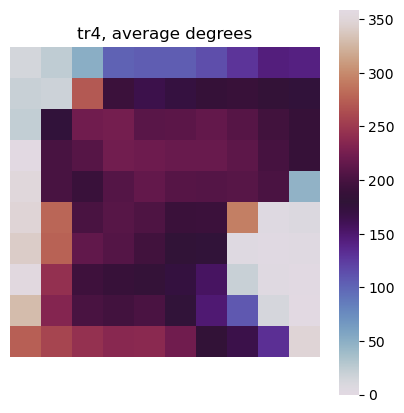

<Figure size 640x480 with 0 Axes>

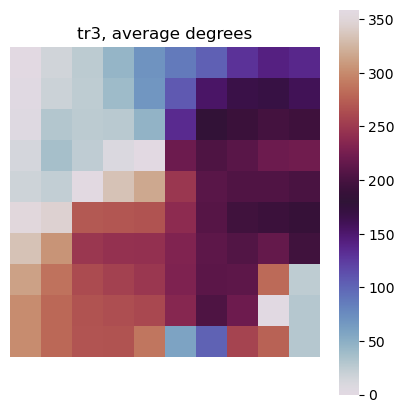

<Figure size 640x480 with 0 Axes>

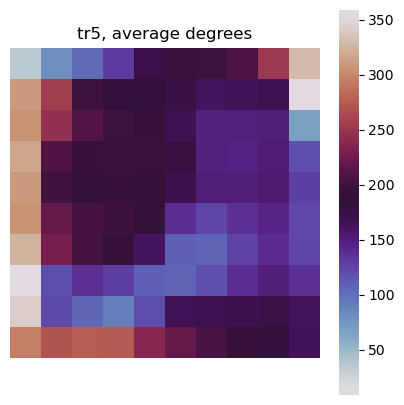

<Figure size 640x480 with 0 Axes>

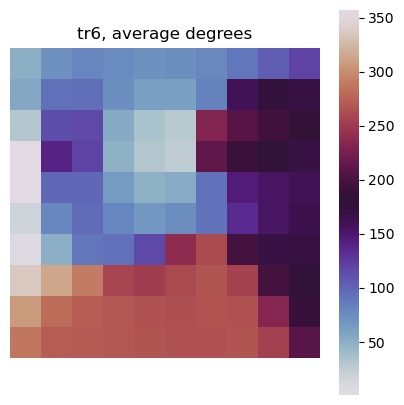

<Figure size 640x480 with 0 Axes>

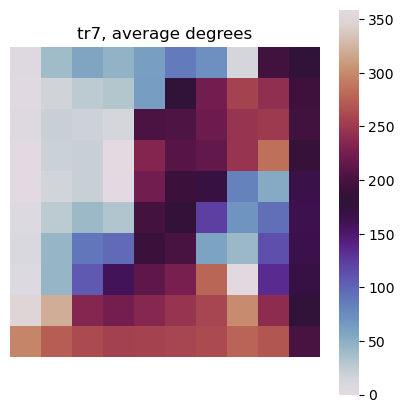

<Figure size 640x480 with 0 Axes>

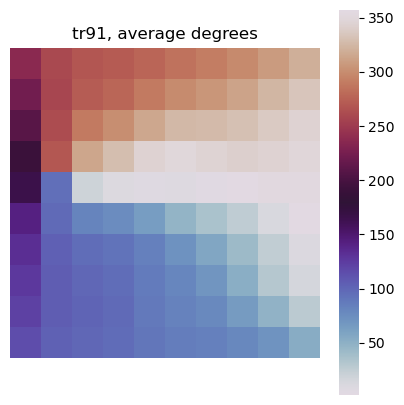

<Figure size 640x480 with 0 Axes>

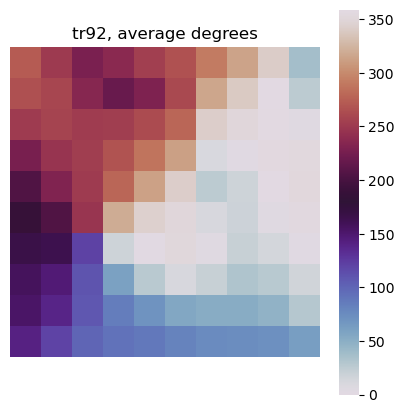

<Figure size 640x480 with 0 Axes>

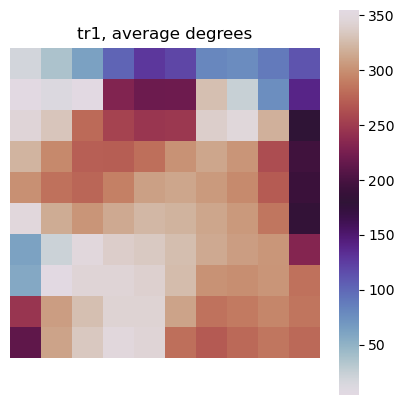

<Figure size 640x480 with 0 Axes>

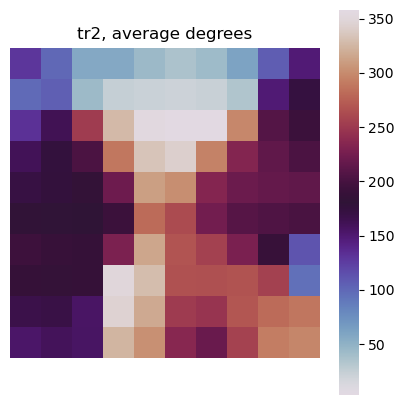

In [30]:
for i in range(len(dfs)):
    plt.figure()
    turnsMapTry(dfs[i],names[i],10)
    plt.show()

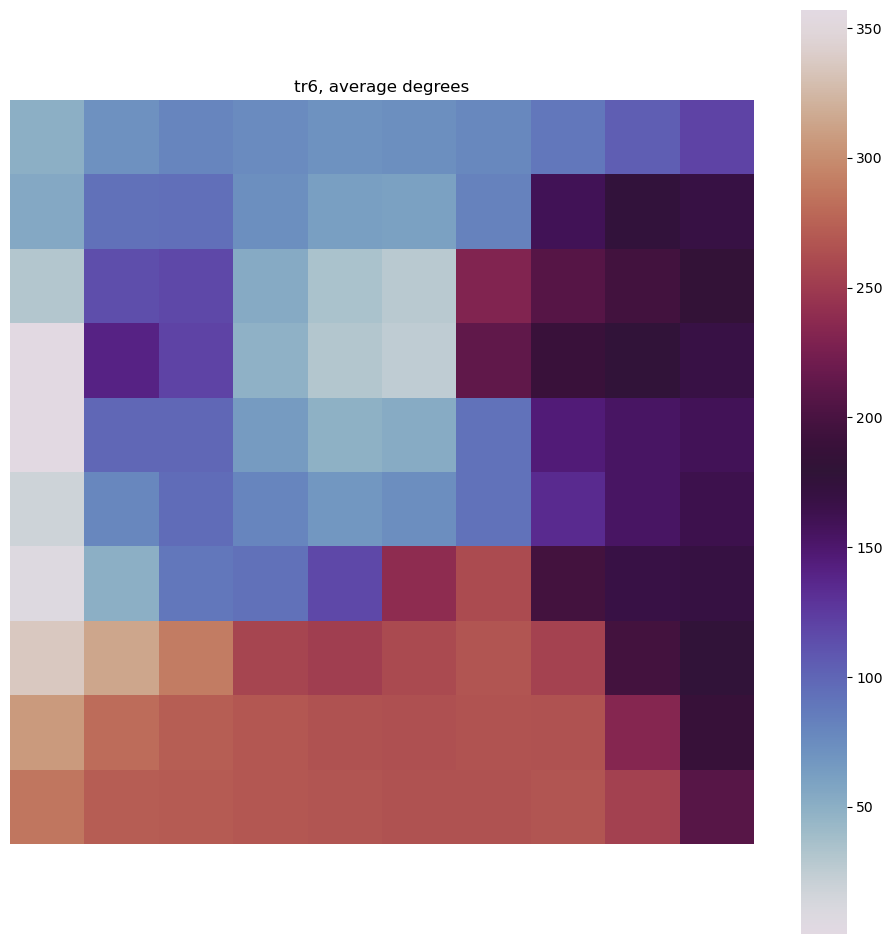

In [26]:
arct = turnsMapTry(dfs[3],names[3],10)

In [25]:
arct = turnsMap(dfs[3],names[3],10)

NameError: name 'turnsMap' is not defined

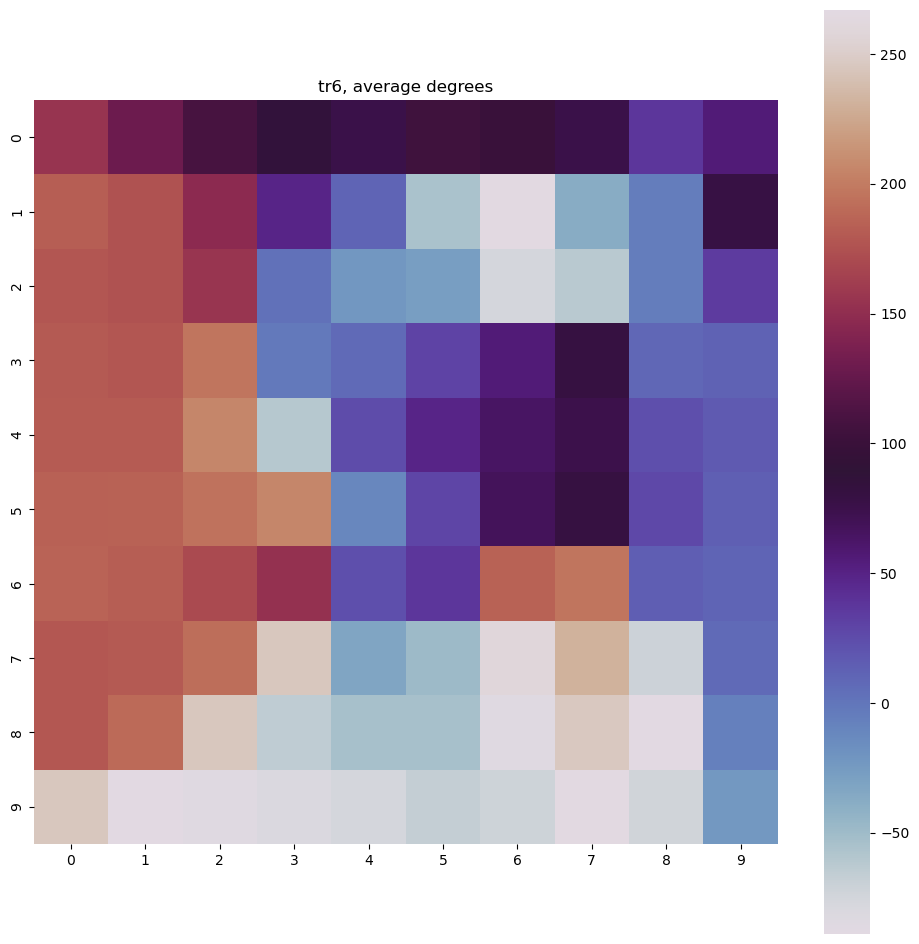

In [124]:
arct = turnsMapOld(dfs[3],names[3],10)

In [105]:
arct

array([[294, 320, 340,   4,  13, 345, 350,  13,  51,  33],
       [266, 274, 302,  40,  78, 145, 184, 128,  95,  10],
       [271, 274, 293,  86, 112, 117, 166, 152,  95,  54],
       [269, 271, 253,  92,  82,  59,  33,   8,  80,  77],
       [268, 268, 243, 151,  64,  40,  25,  14,  66,  72],
       [265, 264, 254, 243, 101,  60,  21,   8,  62,  75],
       [263, 266, 279, 296,  66,  51, 264, 253,  74,  78],
       [270, 269, 257, 204, 123, 139, 190, 218, 161,  82],
       [270, 259, 204, 155, 144, 144, 175, 203, 179,  97],
       [204, 182, 175, 170, 166, 157, 162, 183, 163, 113]])

In [95]:
arctOld

array([[155, 129, 109,  85,  76, 104,  99,  76,  38,  56],
       [183, 175, 147,  49,  11, -55, 265, -38,  -5,  79],
       [178, 175, 156,   3, -22, -27, -76, -62,  -5,  35],
       [180, 178, 196,  -2,   7,  30,  56,  81,   9,  12],
       [181, 181, 206, -61,  25,  49,  64,  75,  23,  17],
       [184, 185, 195, 206, -11,  29,  68,  81,  27,  14],
       [186, 183, 170, 153,  23,  38, 185, 196,  15,  11],
       [179, 180, 192, 245, -33, -49, 259, 231, -71,   7],
       [179, 190, 245, -65, -54, -54, -85, 246, -89,  -7],
       [245, 267, -85, -80, -76, -67, -72, 266, -73, -23]])

### углы с фильтрацией

In [99]:
#n=10
#df = dfs[3]
#name = names[3]
def turnsMapOld(df,name,n):
    ind = range(0, len(df))
    df = df.reindex(ind)   
    binx = np.linspace(df["x"].min() - 0.1, df["x"].max() + 0.1, n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    biny = np.linspace(df["y"].min(), df["y"].max(), n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).mean()
    dfvx = pd.DataFrame(dfn.loc[:, 'Vx'])
    dfvx = dfvx.unstack()
    #print(dfvx)
    dfvy = pd.DataFrame(dfn.loc[:, 'Vy'])
    dfvy = dfvy.unstack()
    forVect = []
    for i in range(n):
        kk = []
        for j in range(n):
            #если пустая клетка
            if np.isnan(dfvx.iloc[i][j]) or np.isnan(dfvy.iloc[i][j]):
                aa=[]
                if i < n-2:
                    aa.append([dfvx.iloc[i+1][j],dfvy.iloc[i+1][j]])
                    if j < n-2:
                        aa.append([dfvx.iloc[i+1][j+1],dfvy.iloc[i+1][j+1]])
                    if j > 0:
                        aa.append([dfvx.iloc[i+1][j-1],dfvy.iloc[i+1][j-1]])
                if j < n-2:
                    aa.append([dfvx.iloc[i][j+1],dfvy.iloc[i][j+1]])
                    if i > 0:
                        aa.append([dfvx.iloc[i-1][j+1],dfvy.iloc[i-1][j+1]])
                if i > 0:
                    aa.append([dfvx.iloc[i-1][j],dfvy.iloc[i-1][j]])
                    if j > 0:
                        aa.append([dfvx.iloc[i-1][j-1],dfvy.iloc[i-1][j-1]])
                if j > 0:
                    aa.append([dfvx.iloc[i][j-1],dfvy.iloc[i][j-1]])
                aa = np.array(aa)
                aax = aa[:,0]
                aay = aa[:,1]
                aaxmean = np.nanmean(aax)
                aaymean = np.nanmean(aay)
                kk.append([binx[i],biny[j],aaxmean,aaymean])
                #print('aa',aa,'aastop',aa.shape)
                #print('aax',aax,'aastop',aax.shape,'mean',aaxmean) 
            #если все ок
            else:
                kk.append([binx[i],biny[j],dfvx.iloc[i][j],dfvy.iloc[i][j]])
        forVect.append(kk)
    Vectors = np.array(forVect)
    vectx = Vectors[:,:,2]
    vecty = Vectors[:,:,3]
    vectx = gaussian_filter(vectx, sigma=0.7)
    vecty = gaussian_filter(vecty, sigma=0.7)
    arct = np.empty(shape=(n, n), dtype=int)
    for i in range(n):
            #попробуем реверсд ранге чтобы не было проблем с тем что ось ч на хитмапе напривлена вниз
            #for j in reversed(range(n)):
            for j in range(n):
                vx = vectx[i][j]
                vy = vecty[i][j]
                x = vy/vx
                if vx >= 0:
                    res = math.degrees(math.atan(x))
                else:
                    res = 180 + math.degrees(math.atan(x))
                arct[i][j] = res
    plt.figure(figsize=(12,12))                
    #sns.heatmap(arct,cmap='twilight',square=True,xticklabels=False, yticklabels=False)
    sns.heatmap(arct,cmap='twilight',square=True)
    #sns.heatmap(arct,cmap='twilight',square=True).invert_yaxis()
    plt.title(name + ', average degrees')
    #plt.savefig('C:\\Users\\Lenovo\\1navigation\\vectFields\\filtered\\векторнКартаЦвета\\' + name + 'NewVelocityField.png')
    plt.show()
    #print('arct',arct)
    return arct

                                   Vx                                        \
y                  [-49.228, -41.388) [-41.388, -33.548) [-33.548, -25.708)   
x                                                                             
[-41.014, -32.33)           -0.699464           0.013845           0.047408   
[-32.33, -23.646)           -6.370038           1.748451           4.179467   
[-23.646, -14.961)         -19.553947          14.819169         -12.180026   
[-14.961, -6.277)          -13.794972          11.616110          -2.425996   
[-6.277, 2.407)             -9.387476           0.543719          -0.736502   
[2.407, 11.091)             -4.473488           2.533375          -4.050921   
[11.091, 19.775)            -5.545207          17.934098          -2.284570   
[19.775, 28.46)              1.099492          -1.030205          -0.133722   
[28.46, 37.144)             -0.276819           0.539432           0.925652   
[37.144, 45.828)             0.029318          -0.56

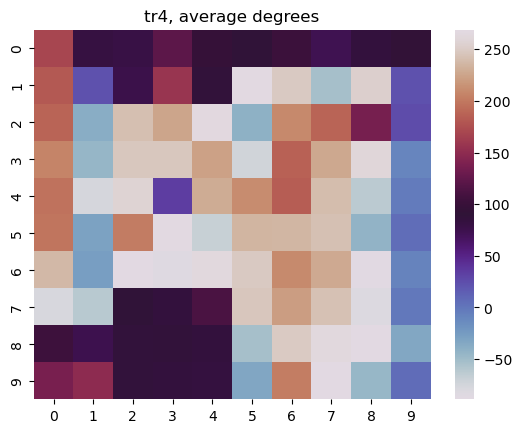

                                   Vx                                        \
y                  [-48.772, -39.037) [-39.037, -29.301) [-29.301, -19.566)   
x                                                                             
[-49.819, -39.855)          -0.437739          -0.594332          -1.395961   
[-39.855, -29.891)          -0.363920          -3.148508          -5.685722   
[-29.891, -19.928)          -0.084130         -15.654743          -4.388305   
[-19.928, -9.964)            3.952501         -15.529440         -13.586016   
[-9.964, 0.0)               -3.901619         -14.993633          -1.194871   
[0.0, 9.964)                15.819907          -0.769330          -4.665387   
[9.964, 19.928)             -3.110320          -0.245152          -6.563567   
[19.928, 29.891)            -4.618991           3.625564          -1.411043   
[29.891, 39.855)            -1.026233           2.170518          -3.175185   
[39.855, 49.819)            -0.309355           1.21

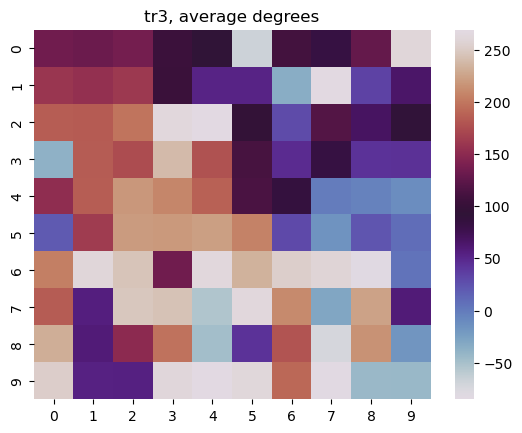

                                   Vx                                       \
y                  [-49.765, -39.827) [-39.827, -29.889) [-29.889, -19.95)   
x                                                                            
[-50.013, -40.01)           -0.579662          -0.632131          0.227987   
[-40.01, -30.008)           -0.960363           0.838893          0.769300   
[-30.008, -20.005)          -3.896195          -1.228564          9.666291   
[-20.005, -10.003)          -4.831174           5.746766          1.460978   
[-10.003, 0.0)              -1.009979           1.853734          1.486131   
[0.0, 10.003)               -0.801558          -6.533469          7.896269   
[10.003, 20.005)            -1.966303           0.642288          3.581285   
[20.005, 30.008)            -0.389753           0.278413          0.136404   
[30.008, 40.01)              0.604713          -1.853711          1.185500   
[40.01, 50.013)              0.178823           0.728323        

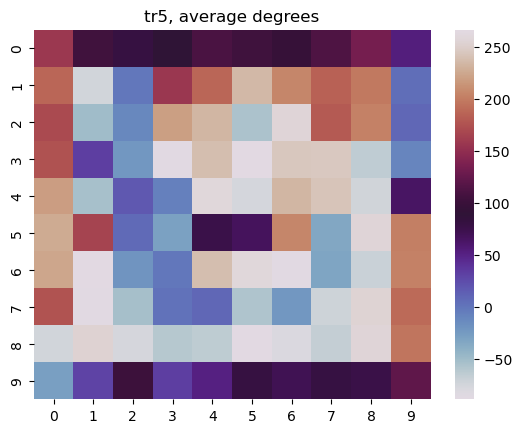

                                   Vx                                        \
y                  [-44.931, -35.518) [-35.518, -26.105) [-26.105, -16.693)   
x                                                                             
[-47.496, -37.769)          -0.093788          -0.684142          -0.202191   
[-37.769, -28.043)          -1.370413          -2.309873          -2.187185   
[-28.043, -18.316)          -7.259292          -5.056058          -1.836757   
[-18.316, -8.589)           -6.085863          -6.426642          -0.414771   
[-8.589, 1.137)             -4.561972         -12.048895          -6.106241   
[1.137, 10.864)             -6.735773         -11.253080           3.854863   
[10.864, 20.591)            -2.614777         -14.834896          -7.015058   
[20.591, 30.318)            -3.046947         -14.059955          -1.773370   
[30.318, 40.044)            -4.163503          -5.306568          -1.650783   
[40.044, 49.771)            -0.498360           0.79

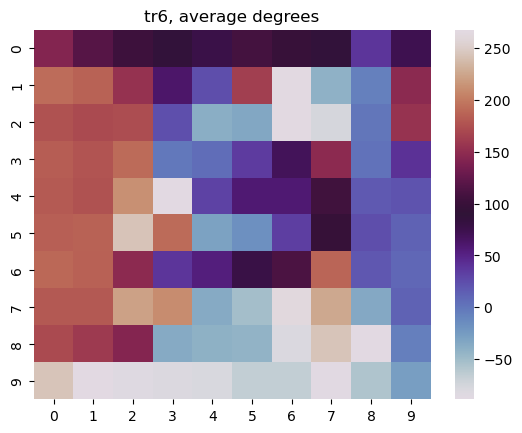

                                   Vx                                        \
y                  [-36.976, -29.194) [-29.194, -21.413) [-21.413, -13.631)   
x                                                                             
[-42.108, -33.898)          -0.448956           0.065917          -0.200222   
[-33.898, -25.688)          -5.238662           0.999476          -0.085379   
[-25.688, -17.478)          -4.050750           0.075837           4.945372   
[-17.478, -9.268)           -6.796165           0.833333           0.853923   
[-9.268, -1.058)            -3.899793           3.515715         -15.417642   
[-1.058, 7.153)            -15.319436           3.112812          -2.819675   
[7.153, 15.363)             -0.433787          -1.088004           0.017942   
[15.363, 23.573)            -1.600583          -1.377833          -1.939276   
[23.573, 31.783)            -1.078987          -0.651779           1.442381   
[31.783, 39.993)             0.022935          -0.32

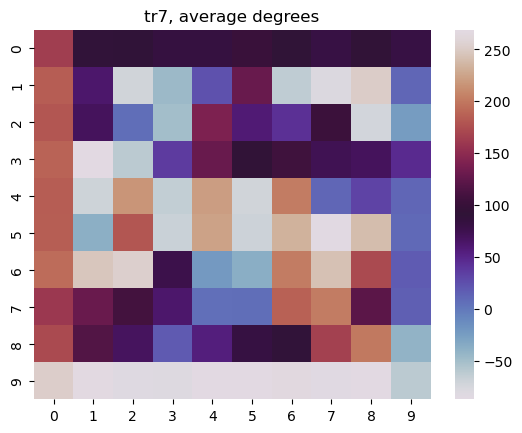

                                   Vx                                        \
y                  [-44.791, -35.902) [-35.902, -27.012) [-27.012, -18.123)   
x                                                                             
[-44.432, -35.5)             0.461632           0.788262           0.146454   
[-35.5, -26.567)             6.063496           5.750861           6.217674   
[-26.567, -17.635)          14.404248           8.818872          26.261704   
[-17.635, -8.703)            6.197072          13.438700          28.682307   
[-8.703, 0.23)              10.515588           5.816717           6.919177   
[0.23, 9.162)                6.563012          20.696185          19.719294   
[9.162, 18.094)              9.783460           4.502328          23.311651   
[18.094, 27.026)             6.391166          13.924379           1.586062   
[27.026, 35.959)             6.697408           4.064502           0.922022   
[35.959, 44.891)             0.373877           1.87

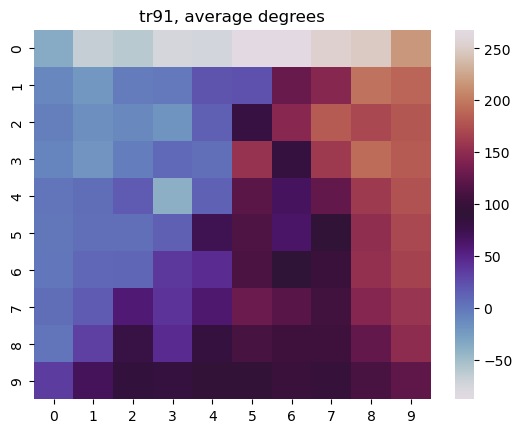

                                   Vx                                      \
y                  [-48.175, -38.362) [-38.362, -28.55) [-28.55, -18.737)   
x                                                                           
[-49.543, -39.736)           0.017081               NaN          0.005493   
[-39.736, -29.929)           4.127307         -0.615667          6.937852   
[-29.929, -20.121)           7.470845          3.163022          5.231691   
[-20.121, -10.314)           6.046518          6.195541         21.502585   
[-10.314, -0.507)           29.538255          8.362859          2.756411   
[-0.507, 9.3)                2.199256         19.575194        -13.863054   
[9.3, 19.107)               14.738565         16.931962          2.338577   
[19.107, 28.915)            15.246698          8.069592         13.185270   
[28.915, 38.722)            13.774501         -1.823165          7.130616   
[38.722, 48.529)             0.011741         -3.818592          0.879274   

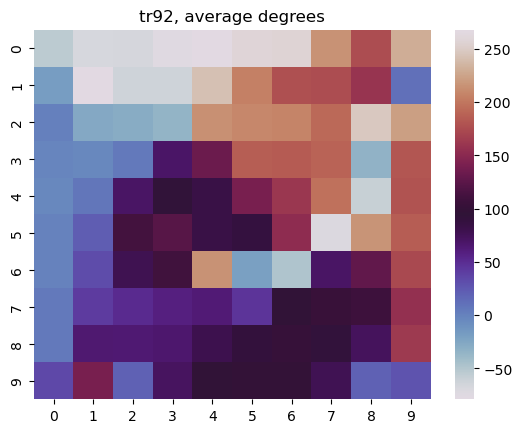

                                   Vx                                        \
y                  [-46.333, -37.053) [-37.053, -27.774) [-27.774, -18.494)   
x                                                                             
[-46.433, -37.146)           0.397625          -0.930886          -0.368606   
[-37.146, -27.86)            2.749790          -8.381354          -1.492556   
[-27.86, -18.573)            2.435930         -12.030481          -1.561865   
[-18.573, -9.287)            0.180852           1.981622          -4.845074   
[-9.287, 0.0)               -0.354835           3.340633          -6.442551   
[0.0, 9.287)                -0.715595          -2.762822          -4.401186   
[9.287, 18.573)             -0.853192          -3.007882          -2.632558   
[18.573, 27.86)              0.003577         -14.777464          -2.171438   
[27.86, 37.146)             -0.109882          -5.421295         -15.099150   
[37.146, 46.433)            -0.031974          -0.78

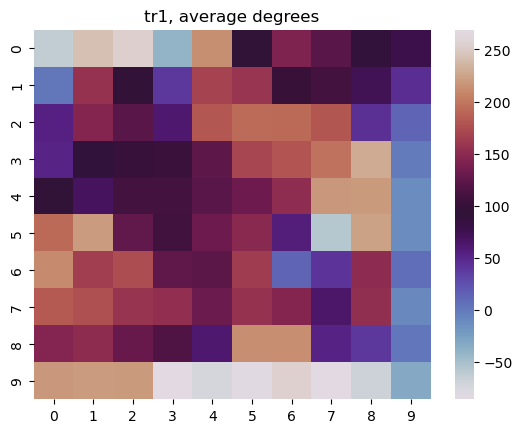

                                  Vx                                   \
y                  [-13.565, -8.365) [-8.365, -3.165) [-3.165, 2.035)   
x                                                                       
[-23.365, -18.408)         -0.084352         0.449646        0.483881   
[-18.408, -13.45)          -0.209881         1.812700       -0.597071   
[-13.45, -8.493)            0.176642         1.617488        1.567579   
[-8.493, -3.535)            0.844454        -2.723123        3.433774   
[-3.535, 1.422)             0.521897        -5.384065       -0.082546   
[1.422, 6.379)              0.078628        -1.440091       -0.066357   
[6.379, 11.337)             0.309120        -0.143052       -6.622042   
[11.337, 16.294)            0.314664        -3.133964       -2.096640   
[16.294, 21.252)            0.016741         0.001749        0.022177   
[21.252, 26.209)            0.003005        -0.000529       -0.127732   

                                                  

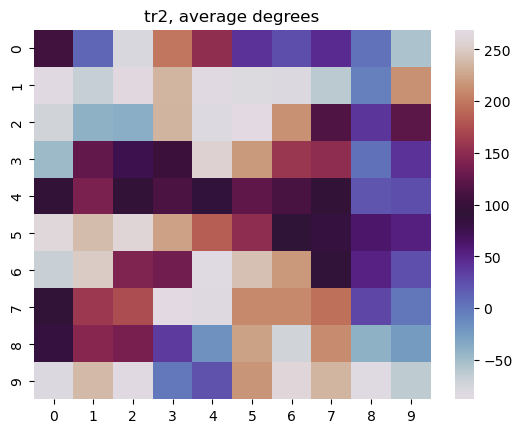

In [165]:
for i in range(len(dfs)):
    turnsMapOld(dfs[i],names[i],10)

In [100]:
arctOld = turnsMapOld(dfs[3],names[3],10)
#print(arctOld)

In [53]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [59]:
arctNew = turnsMap(dfs[3],names[3],10)
arctNew

                                   Vx                                        \
y                  [-44.931, -35.518) [-35.518, -26.105) [-26.105, -16.693)   
x                                                                             
[-47.496, -37.769)          -0.093788          -0.684142          -0.202191   
[-37.769, -28.043)          -1.370413          -2.309873          -2.187185   
[-28.043, -18.316)          -7.259292          -5.056058          -1.836757   
[-18.316, -8.589)           -6.085863          -6.426642          -0.414771   
[-8.589, 1.137)             -4.561972         -12.048895          -6.106241   
[1.137, 10.864)             -6.735773         -11.253080           3.854863   
[10.864, 20.591)            -2.614777         -14.834896          -7.015058   
[20.591, 30.318)            -3.046947         -14.059955          -1.773370   
[30.318, 40.044)            -4.163503          -5.306568          -1.650783   
[40.044, 49.771)            -0.498360           0.79

array([[294, 320, 340,   4,  13, 345, 350,  13,  51,  33],
       [266, 274, 302,  40,  78, 145, 184, 128,  95,  10],
       [271, 274, 293,  86, 112, 117, 166, 152,  95,  54],
       [269, 271, 253,  92,  82,  59,  33,   8,  80,  77],
       [268, 268, 243, 151,  64,  40,  25,  14,  66,  72],
       [265, 264, 254, 243, 101,  60,  21,   8,  62,  75],
       [263, 266, 279, 296,  66,  51, 264, 253,  74,  78],
       [270, 269, 257, 204, 123, 139, 190, 218, 161,  82],
       [270, 259, 204, 155, 144, 144, 175, 203, 179,  97],
       [204, 182, 175, 170, 166, 157, 162, 183, 163, 113]])

In [51]:
print(arctOld[5][7])
print(arctNew[5][7])

81
8


### углы без пространственного сглаживания

In [10]:
#n=10
#df = dfs[3]
#name = names[3]
def turnsMapOld(df,name,n):
    ind = range(0, len(df))
    df = df.reindex(ind)   
    binx = np.linspace(df["x"].min() - 0.1, df["x"].max() + 0.1, n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    biny = np.linspace(df["y"].min(), df["y"].max(), n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).mean()
    dfvx = pd.DataFrame(dfn.loc[:, 'Vx'])
    dfvx = dfvx.unstack()
    print(dfvx)
    dfvy = pd.DataFrame(dfn.loc[:, 'Vy'])
    dfvy = dfvy.unstack()
    forVect = []
    for i in range(n):
        kk = []
        for j in range(n):
            #если пустая клетка
            if np.isnan(dfvx.iloc[i][j]) or np.isnan(dfvy.iloc[i][j]):
                aa=[]
                if i < n-2:
                    aa.append([dfvx.iloc[i+1][j],dfvy.iloc[i+1][j]])
                    if j < n-2:
                        aa.append([dfvx.iloc[i+1][j+1],dfvy.iloc[i+1][j+1]])
                    if j > 0:
                        aa.append([dfvx.iloc[i+1][j-1],dfvy.iloc[i+1][j-1]])
                if j < n-2:
                    aa.append([dfvx.iloc[i][j+1],dfvy.iloc[i][j+1]])
                    if i > 0:
                        aa.append([dfvx.iloc[i-1][j+1],dfvy.iloc[i-1][j+1]])
                if i > 0:
                    aa.append([dfvx.iloc[i-1][j],dfvy.iloc[i-1][j]])
                    if j > 0:
                        aa.append([dfvx.iloc[i-1][j-1],dfvy.iloc[i-1][j-1]])
                if j > 0:
                    aa.append([dfvx.iloc[i][j-1],dfvy.iloc[i][j-1]])
                aa = np.array(aa)
                aax = aa[:,0]
                aay = aa[:,1]
                aaxmean = np.nanmean(aax)
                aaymean = np.nanmean(aay)
                kk.append([binx[i],biny[j],aaxmean,aaymean])
                #print('aa',aa,'aastop',aa.shape)
                #print('aax',aax,'aastop',aax.shape,'mean',aaxmean) 
            #если все ок
            else:
                kk.append([binx[i],biny[j],dfvx.iloc[i][j],dfvy.iloc[i][j]])
        forVect.append(kk)
    Vectors = np.array(forVect)
    #dfvxNum = dfvx.to_numpy()
    #dfvyNum = dfvy.to_numpy()
    arct = np.empty(shape=(n, n), dtype=int)
    for i in range(n):
            for j in range(n):
                vx = Vectors[i][j][2]
                vy = Vectors[i][j][3]
                x = vy/vx
                if vx >= 0:
                    res = math.degrees(math.atan(x))
                    arct[i][j] = res
                else:
                    res = 180 + math.degrees(math.atan(x))
                    arct[i][j] = res
    plt.figure()                
    sns.heatmap(arct,cmap='twilight')
    plt.title(name + ', average degrees')
    plt.show()

In [13]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [14]:
for i in range(len(dfs)):
    turnsMapOld(dfs[i],names[i],10)

                                   Vx                                        \
y                  [-49.228, -41.388) [-41.388, -33.548) [-33.548, -25.708)   
x                                                                             
[-41.014, -32.33)           -0.699464           0.013845           0.047408   
[-32.33, -23.646)           -6.370038           1.748451           4.179467   
[-23.646, -14.961)         -19.553947          14.819169         -12.180026   
[-14.961, -6.277)          -13.794972          11.616110          -2.425996   
[-6.277, 2.407)             -9.387476           0.543719          -0.736502   
[2.407, 11.091)             -4.473488           2.533375          -4.050921   
[11.091, 19.775)            -5.545207          17.934098          -2.284570   
[19.775, 28.46)              1.099492          -1.030205          -0.133722   
[28.46, 37.144)             -0.276819           0.539432           0.925652   
[37.144, 45.828)             0.029318          -0.56

                                   Vx                                        \
y                  [-44.931, -35.518) [-35.518, -26.105) [-26.105, -16.693)   
x                                                                             
[-47.496, -37.769)          -0.093788          -0.684142          -0.202191   
[-37.769, -28.043)          -1.370413          -2.309873          -2.187185   
[-28.043, -18.316)          -7.259292          -5.056058          -1.836757   
[-18.316, -8.589)           -6.085863          -6.426642          -0.414771   
[-8.589, 1.137)             -4.561972         -12.048895          -6.106241   
[1.137, 10.864)             -6.735773         -11.253080           3.854863   
[10.864, 20.591)            -2.614777         -14.834896          -7.015058   
[20.591, 30.318)            -3.046947         -14.059955          -1.773370   
[30.318, 40.044)            -4.163503          -5.306568          -1.650783   
[40.044, 49.771)            -0.498360           0.79

                                   Vx                                      \
y                  [-48.175, -38.362) [-38.362, -28.55) [-28.55, -18.737)   
x                                                                           
[-49.543, -39.736)           0.017081               NaN          0.005493   
[-39.736, -29.929)           4.127307         -0.615667          6.937852   
[-29.929, -20.121)           7.470845          3.163022          5.231691   
[-20.121, -10.314)           6.046518          6.195541         21.502585   
[-10.314, -0.507)           29.538255          8.362859          2.756411   
[-0.507, 9.3)                2.199256         19.575194        -13.863054   
[9.3, 19.107)               14.738565         16.931962          2.338577   
[19.107, 28.915)            15.246698          8.069592         13.185270   
[28.915, 38.722)            13.774501         -1.823165          7.130616   
[38.722, 48.529)             0.011741         -3.818592          0.879274   

### драфт по усреднению векторов

aax [ 0.16033018 12.08799182 -1.66213172         nan  0.39391965 -0.57770516
 -0.60513414 -4.85901758] aastop (8,) mean 0.7054647199540044
aax [ 12.08799182 -13.75533558   0.16033018  -4.26004099  -1.04643083
   0.39391965  -0.57770516          nan] aastop (8,) mean -0.9996101313980821
aax [-6.32963931e+00  3.76958167e+00 -5.49604550e+00  9.92215408e-01
  3.84151503e-03 -3.50830614e+00 -2.01280616e+00 -3.91575998e+00] aastop (8,) mean -2.062114812357774
aax [ 1.47642633  2.46061035  0.92565219         nan -2.69593899  2.97092654
 -2.28457041 -0.13372182] aastop (8,) mean 0.38848345645491383
aax [ 2.46061035 11.28475423  1.47642633 -8.11965715 -6.05451729 -2.69593899
  2.97092654         nan] aastop (8,) mean 0.18894343154166723
(10, 10, 4)
-0.6994639088595452 0.21965177347839648 0.7331416380136099
0.013844979751272128 0.4074216715103259 0.40765684328928053
0.04740792649243718 0.5243178107356867 0.526456720109997
-0.6051341446081024 1.0972220165824944 1.2530297229690666
-0.5777051631753

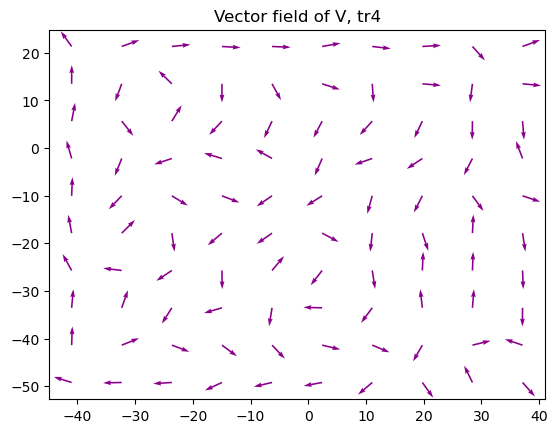

In [32]:
df = dfs[0]
name = names[0]
if True:
    ind = range(0, len(df))
    df = df.reindex(ind)   
    binx = np.linspace(df["x"].min() - 0.1, df["x"].max() + 0.1, n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    biny = np.linspace(df["y"].min(), df["y"].max(), n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).mean()
    dfvx = pd.DataFrame(dfn.loc[:, 'Vx'])
    dfvx = dfvx.unstack()
    #print(dfvx)
    dfvy = pd.DataFrame(dfn.loc[:, 'Vy'])
    dfvy = dfvy.unstack()
    forVect = []
    for i in range(n):
        kk = []
        for j in range(n):
            #если пустая клетка
            if np.isnan(dfvx.iloc[i][j]) or np.isnan(dfvy.iloc[i][j]):
                aa=[]
                if i < n-2:
                    aa.append([dfvx.iloc[i+1][j],dfvy.iloc[i+1][j]])
                    if j < n-2:
                        aa.append([dfvx.iloc[i+1][j+1],dfvy.iloc[i+1][j+1]])
                    if j > 0:
                        aa.append([dfvx.iloc[i+1][j-1],dfvy.iloc[i+1][j-1]])
                if j < n-2:
                    aa.append([dfvx.iloc[i][j+1],dfvy.iloc[i][j+1]])
                    if i > 0:
                        aa.append([dfvx.iloc[i-1][j+1],dfvy.iloc[i-1][j+1]])
                if i > 0:
                    aa.append([dfvx.iloc[i-1][j],dfvy.iloc[i-1][j]])
                    if j > 0:
                        aa.append([dfvx.iloc[i-1][j-1],dfvy.iloc[i-1][j-1]])
                if j > 0:
                    aa.append([dfvx.iloc[i][j-1],dfvy.iloc[i][j-1]])
                aa = np.array(aa)
                aax = aa[:,0]
                aay = aa[:,1]
                aaxmean = np.nanmean(aax)
                aaymean = np.nanmean(aay)
                kk.append([binx[i],biny[j],aaxmean,aaymean])
                #print('aa',aa,'aastop',aa.shape)
                print('aax',aax,'aastop',aax.shape,'mean',aaxmean) 
            #если все ок
            else:
                kk.append([binx[i],biny[j],dfvx.iloc[i][j],dfvy.iloc[i][j]])
        forVect.append(kk)
    Vectors = np.array(forVect)
    print(Vectors.shape)
    plt.figure()
    for i in Vectors:
        for j in i:
            l = pow((pow(j[2], 2) + pow(j[3], 2)), 0.5)
            print(j[2], j[3], l)
            plt.quiver(j[0], j[1], j[2], j[3], color='darkmagenta', units='xy', scale=l/3.5, width=0.3)
    # Show plot with grid
    #plt.grid()
    plt.title("Vector field of V, " + name)
    #plt.savefig('C:\\Users\\Lenovo\\1navigation\\vectFields\\' + name + 'NewVelocityField.png')
    plt.show()

### вычислим углы для векторов

как превратить vx и vy в угол, если это типа тригонометрический круг где vx это косинус а vy это синус

если повернуть хитмап на 90 градусов против часовой будет соотвествие векторным полям

In [21]:
n=10
df = dfs[3]
name = names[3]
def turnsMap(df,name):
    ind = range(0, len(df))
    df = df.reindex(ind)   
    binx = np.linspace(df["x"].min() - 0.1, df["x"].max() + 0.1, n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    biny = np.linspace(df["y"].min(), df["y"].max(), n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).mean()
    dfvx = pd.DataFrame(dfn.loc[:, 'Vx'])
    dfvx = dfvx.unstack()
    #print(dfvx)
    dfvy = pd.DataFrame(dfn.loc[:, 'Vy'])
    dfvy = dfvy.unstack()
    dfvxNum = dfvx.to_numpy()
    dfvyNum = dfvy.to_numpy()
    arct = np.empty(shape=(n, n), dtype=int)
    for i in range(n):
            for j in range(n):
                vx = dfvxNum[i][j]
                vy = dfvyNum[i][j]
                x = vy/vx
                if vx >= 0:
                    res = math.degrees(math.atan(x))
                    arct[i][j] = res
                else:
                    res = 180 + math.degrees(math.atan(x))
                    arct[i][j] = res
    plt.figure()                
    sns.heatmap(arct,cmap='twilight')
    plt.title(name + ', average degrees')
    plt.show()

                                   Vx                                       \
y                  [-49.765, -39.827) [-39.827, -29.889) [-29.889, -19.95)   
x                                                                            
[-50.013, -40.01)           -0.579662          -0.632131          0.227987   
[-40.01, -30.008)           -0.960363           0.838893          0.769300   
[-30.008, -20.005)          -3.896195          -1.228564          9.666291   
[-20.005, -10.003)          -4.831174           5.746766          1.460978   
[-10.003, 0.0)              -1.009979           1.853734          1.486131   
[0.0, 10.003)               -0.801558          -6.533469          7.896269   
[10.003, 20.005)            -1.966303           0.642288          3.581285   
[20.005, 30.008)            -0.389753           0.278413          0.136404   
[30.008, 40.01)              0.604713          -1.853711          1.185500   
[40.01, 50.013)              0.178823           0.728323        

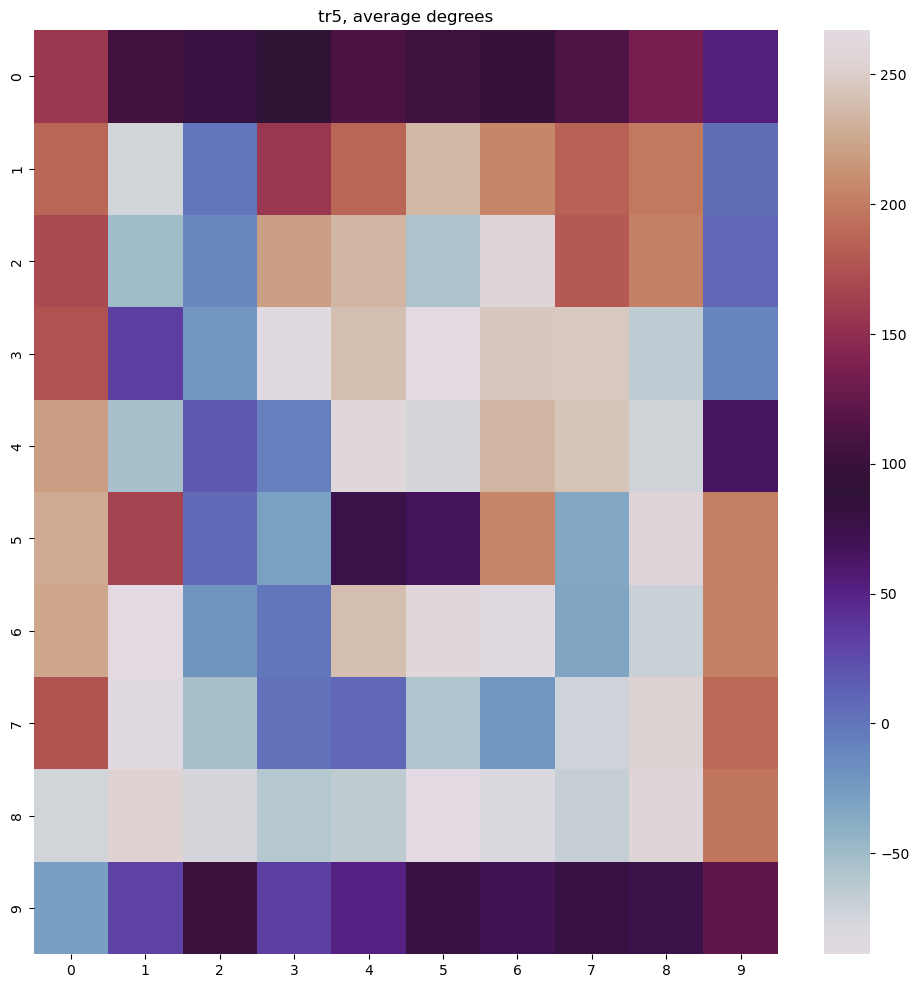

In [34]:
turnsMap(dfs[2],names[2],10)

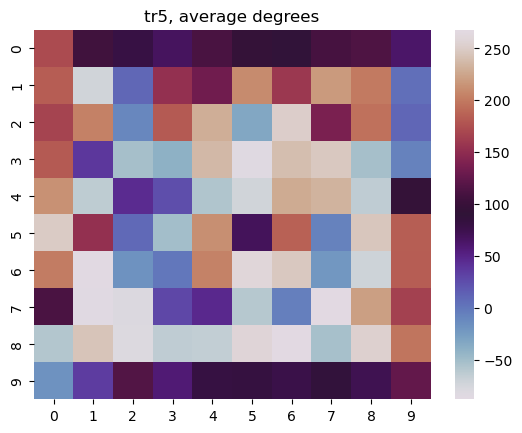

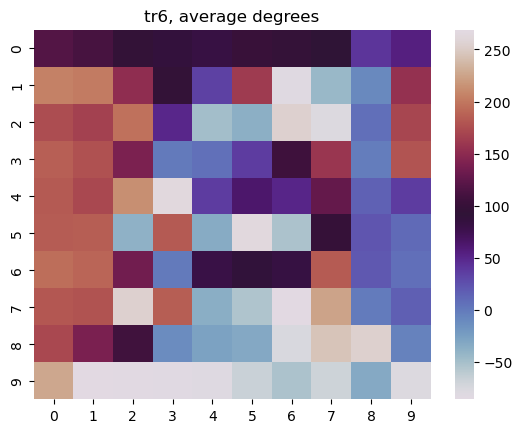

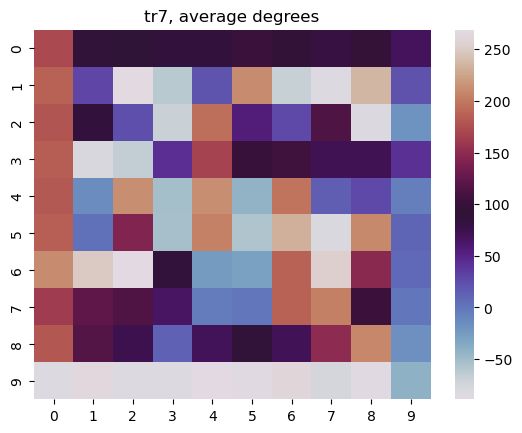

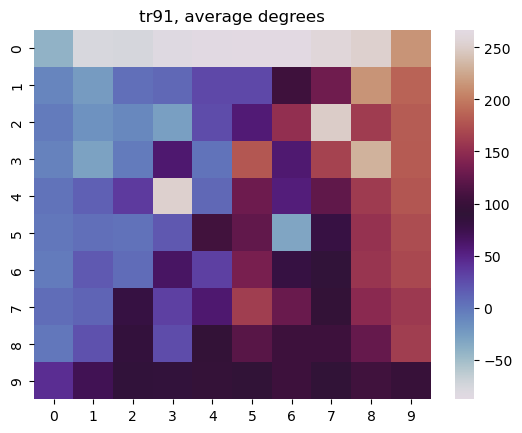

In [30]:
for i in (2,3,4,5):
    turnsMap(dfs[i],names[i])
    

In [12]:

dfvxNum = dfvx.to_numpy()
dfvyNum = dfvy.to_numpy()

In [59]:
#проверяю что вычиленные углы адекватны
a = dfvyNum[1][9]/dfvxNum[1][9]
180 + math.degrees(math.atan(a))

155.7758954496809

In [21]:
#[i][j] или наоборот?
#проверить на реальных примерах
arct = np.empty(shape=(n, n), dtype=int)
for i in range(n):
        for j in range(n):
            vx = dfvxNum[i][j]
            vy = dfvyNum[i][j]
            x = vy/vx
            if vx >= 0:
                res = math.degrees(math.atan(x))
                arct[i][j] = res
            else:
                res = 180 + math.degrees(math.atan(x))
                arct[i][j] = res
                

In [22]:
arct

array([[118, 111,  96,  87,  82, 101,  97,  92,  41,  55],
       [205, 202, 152,  95,  34, 162, -82, -44, -10, 155],
       [175, 166, 196,  50, -49, -37, 255, -79,   7, 170],
       [186, 177, 140,   0,   6,  37, 106, 159,  -2, 179],
       [182, 171, 213, 264,  37,  63,  51, 127,  15,  37],
       [184, 185, -39, 182, -34, 264, -53,  98,  22,  10],
       [194, 189, 134,   0,  80,  89,  83, 183,  21,   7],
       [181, 178, 255, 185, -36, -54, 269, 225,  -1,  17],
       [171, 139, 107, -12, -27, -32, -76, 245, 254,  -5],
       [227, -86, -84, -83, -81, -67, -53, -69, -33, -79]])

<AxesSubplot:>

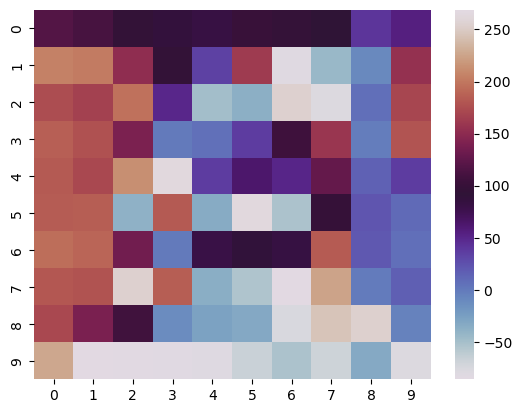

In [66]:
sns.heatmap(arct,cmap='twilight')

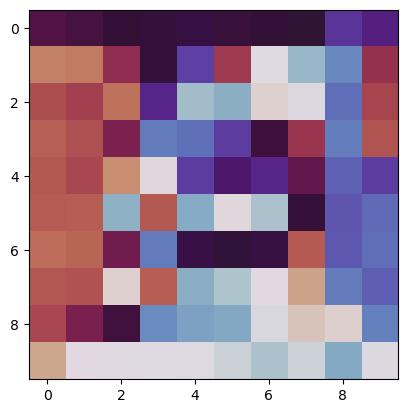

In [64]:
plt.imshow(arct, cmap='twilight')
plt.show()

(10, 10, 4)
-0.6994639088595452 0.21965177347839648 0.7331416380136099
0.013844979751272128 0.4074216715103259 0.40765684328928053
0.04740792649243718 0.5243178107356867 0.526456720109997
-0.6051341446081024 1.0972220165824944 1.2530297229690666
-0.577705163175365 3.119794888989447 3.172832079534647
0.39391964705604343 9.712887814295735 9.720872511324863
-1.0464308313071056 3.668652934786092 3.8149746841394223
1.9825746378070481 10.246611476281425 10.436649315768829
0.01650941930867754 3.6133097195748967 3.61334743561982
-0.16407460281307448 0.22789510729425458 0.28081427174723145
-6.370037564254518 -0.1547480836257159 6.3719169438560215
1.7484511239855307 0.7012644381292223 1.883839999880818
4.179466973851879 11.928581512847066 12.639580732530465
-4.859017575610183 0.5932725634221434 4.895102055585577
nan nan nan
nan nan nan
-4.260040986894206 -10.595564120225987 11.419891778639535
9.189767881745517 -11.618100159073345 14.813240193375032
-0.30215489242120147 -0.8029367657651822 0.8579

(10, 10, 4)
-0.5796617239831576 0.07465113311166825 0.5844488907731645
-0.6321306440321256 2.1853156526023008 2.2749051964055753
0.22798660254010306 1.3142740762992393 1.3339018849113293
0.4646814224678779 1.1122075271124634 1.2053772885501002
-1.0037142199738487 2.5118405794091614 2.7049556986657404
-0.2583472602758568 2.747053274872368 2.7591746957884062
0.04853607592806645 1.9132142763439046 1.9138298299150385
-0.8004519845370713 2.2125730428542325 2.352913693596638
-0.7431569308706439 1.5937697908508062 1.7585176627289525
0.6421289967304095 1.3009319924861946 1.4507769289301862
-0.9603628193005009 -0.05566965205893626 0.9619749762104883
0.8388931508503348 -2.6632783681162446 2.792273873498001
0.7693002354618429 0.14168695624243227 0.7822391231911708
-2.6723542319407962 1.3205898931874471 2.980844646565922
-1.8506501981997807 2.0185023337245473 2.738477282605852
-3.2225098584106617 -1.8707643072969216 3.7261681230199524
-1.1889952151979795 0.4537951243409087 1.2726506341644868
-0.50

(10, 10, 4)
-0.44895635851806764 0.05920490473084595 0.45284327597745366
0.06591713919409595 2.39077301937237 2.391681563126332
-0.20022195941652138 6.619027208981502 6.622054819032386
1.0524648737706408 13.60541643483646 13.646063120029861
0.3014831408962784 3.4534147275768743 3.466549489750513
-1.6046466126329963 8.088728873854887 8.246358320262848
-0.1998554477802549 2.9849271739022316 2.99161034118874
0.5406095626931903 3.424380026521116 3.4667906289985386
-0.2144061262318399 2.2429724363604984 2.2531966929761578
0.06763805658326898 0.16755184070029117 0.18068903126758204
-5.238662331985242 -0.5765030171985477 5.270288299267895
0.9994762638918828 0.5936376701120847 1.162479455930031
-0.08537940555359433 -3.9894641057489664 3.990377612952449
1.9608880227221586 -3.814184842907028 4.288716340994928
3.2624451936264114 1.252901050236309 3.4947545955473496
-2.1916565838867177 -1.326689491258604 2.5619257576889325
1.3851709946704065 -3.584517755505527 3.842846109852772
0.3003428479015065 

12.247528878386746 8.17407403919212 14.724722409102045
8.662036527417545 15.414128337837262 17.681239470626302
-4.998582229577831 1.5551500939843905 5.234913191321413
-3.5290580394935405 4.496985026799922 5.716390904878417
-0.3823229777309546 6.497910435277614 6.509148245676294
-13.827653198119545 9.317095879042212 16.673699906941202
-5.74945934188051 2.1824382448204345 6.149741410530362
6.69740842594028 -0.109996801061217 6.698311646982362
4.064501704785248 1.7465525298130171 4.423869329851238
0.92202207318339 12.516360715361689 12.550275306163078
6.142375648964547 3.053564563079696 6.859521495985615
-0.549723284129014 6.661442385783101 6.684086351044639
-1.8919459168934363 3.354150399505268 3.850945890940445
-3.9403816528267104 16.03110169031662 16.508265474458717
-3.993776087619749 17.235662287702766 17.692323248623474
-5.80207307700619 7.9042307891010335 9.805147441945625
-1.7536927540704839 0.5374983543246361 1.834214479438272
0.37387739980192686 0.36408816526068055 0.521866364278

-14.777464453522924 0.08714063058941211 14.777721379313968
-2.1714384167469385 0.1418637330360319 2.1760675808612584
-10.007810955877352 3.5749818874612793 10.627171572166084
3.8013124464980153 -1.5799001456045145 4.1165593383287815
-29.37856581293407 13.20567054515802 32.21008947165706
nan nan nan
2.707802329836538 5.018863405744341 5.702734724935737
-0.6272337336915779 -1.4722802646297724 1.6003222595149358
2.796205262338489 -0.49202325808441943 2.8391637423060803
-0.10988201767138195 0.4405689095896127 0.45406499744476475
-5.421294674251817 2.7960721347146307 6.099873386194073
-15.099150202900816 19.655491865237543 24.785534033265836
-0.05104674773252195 3.8569517462710605 3.857289533275594
0.8368042615077589 2.5756076044099503 2.7081351339938537
1.1573189166679378 -3.167390587097455 3.372202574892411
-1.5840025416615435 -0.97519199385732 1.8601245863849134
0.7842357744552407 1.3149314185687144 1.5310357231216203
2.722511435207771 2.9189704007456827 3.991548160208829
2.1313106068113

### Bad Improved divergency

In [56]:
def divMap(df, n, name):
    ind = range(0, len(df))
    df = df.reindex(ind)
    vx = []
    vy = []
    div = []
    for i in range(len(df)):
        if i == 0:
            div.append(0)
        elif (df['x'][i]-df['x'][i-1])==0 or (df['y'][i]-df['y'][i-1])==0:
            div.append(0)
        else:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            #dt = df['time'][i]-df['time'][i-1]
            div.append(df['Vx'][i]/dx + df['Vy'][i]/dy)
    df.insert(6, "divergence", div)
    print(df)
    xmin = df["x"].min() - 0.1
    xmax = df["x"].max() + 0.1
    binx = np.linspace(xmin, xmax, n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    ymin = df["y"].min() - 0.1
    ymax = df["y"].max() + 0.1
    biny = np.linspace(ymin, ymax, n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    df = df.loc[:, 'divergence']
    dfn = df.groupby([x_cut, y_cut]).mean()
    print(dfn)
    #dfn = pd.DataFrame(dfn.loc[:, 'divergence'])
    dfn = dfn.unstack()
    #Replace NaN with epsilons
    dfn = dfn.fillna(0.1)
    #??
    plt.figure()
    sns.heatmap(dfn, robust=False, square=True, xticklabels=False, yticklabels=False)
    plt.savefig('C:\\Users\\Lenovo\\1navigation\\divergence\\' + name + '_filteredV_diverge.png')
    return dfn

In [61]:
def divMap(df, n, name):
    ind = range(0, len(df))
    df = df.reindex(ind)
    vx = []
    vy = []
    div = []
    for i in range(len(df)):
        if i == 0:
            div.append(0)
        elif (df['x'][i]-df['x'][i-1])==0 or (df['y'][i]-df['y'][i-1])==0:
            div.append(0)
        else:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            #dt = df['time'][i]-df['time'][i-1]
            div.append(df['Vx'][i]/dx + df['Vy'][i]/dy)
    df.insert(6, "divergence", div)
    #print(df)
    xmin = df["x"].min() - 0.1
    xmax = df["x"].max() + 0.1
    binx = np.linspace(xmin, xmax, n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    ymin = df["y"].min() - 0.1
    ymax = df["y"].max() + 0.1
    biny = np.linspace(ymin, ymax, n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    #df = df.loc[:, 'divergence']
    dfn = df.groupby([x_cut, y_cut]).mean()
    print(dfn)
    dfn = pd.DataFrame(dfn.loc[:, 'divergence'])
    dfn = dfn.unstack()
    #Replace NaN with epsilons
    dfn = dfn.fillna(0.1)
    #??
    plt.figure()
    sns.heatmap(dfn, robust=False, square=True, xticklabels=False, yticklabels=False)
    plt.savefig('C:\\Users\\Lenovo\\1navigation\\divergence\\' + name + '_filteredV_diverge.png')
    return dfn

In [57]:
dfsnames = ['tr4', 'tr3', 'tr5', 'tr6', 'tr7', 'tr91', 'tr92']
#можно конечно переделать это в словарь, но и так имена соотвествуют порядку объектов в dfs

In [22]:
for i in range(len(names)):
    divMap(dfs[i],15,names[i])
    

           time       x       y        Vx   Vy  divergence
0         1.001  -3.355  -5.324  0.000000  0.0    4.798430
1         1.034  -3.355  -5.324  0.000000  0.0    5.059867
2         1.068  -3.355  -5.324  0.000000  0.0    5.566066
3         1.101  -3.355  -5.324  0.000000  0.0    6.290519
4         1.134  -3.282  -5.324  2.212121  0.0    7.197515
...         ...     ...     ...       ...  ...         ...
45184  1754.853  45.655 -49.228  0.000000  0.0    0.000000
45185  1754.886  45.655 -49.228  0.000000  0.0    0.000000
45186  1754.920  45.655 -49.228  0.000000  0.0    0.000000
45187  1754.953  45.655 -49.228  0.000000  0.0    0.000000
45188  1754.987  45.655 -49.228  0.000000  0.0    0.000000

[45189 rows x 6 columns]
          time       x      y        Vx        Vy  divergence
0        1.001  -3.409 -2.178  0.000000  0.000000    8.240964
1        1.134  -3.409 -2.178  0.000000  0.000000    8.476343
2        1.268  -3.409 -2.178  0.000000  0.000000    8.922884
3        1.401  -3

In [ ]:
plt.savefig('books_read.png')

### New improved divergency

In [4]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [34]:
def divMap(df, n, name):
    ind = range(0, len(df))
    df = df.reindex(ind)
    vx = []
    vy = []
    div = []
    for i in range(len(df)):
        if i == 0:
            vx.append(0)
            vy.append(0)
            div.append(0)
        elif (df['x'][i]-df['x'][i-1])==0 or (df['y'][i]-df['y'][i-1])==0:
            vx.append((df['x'][i]-df['x'][i-1])/(df['time'][i]-df['time'][i-1]))
            vy.append((df['y'][i]-df['y'][i-1])/(df['time'][i]-df['time'][i-1]))
            div.append(0)
        else:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            dt = df['time'][i]-df['time'][i-1]
            vvx = dx/dt
            vvy = dy/dt
            vx.append(vvx)
            vy.append(vvy)
            div.append(vvx/dx + vvy/dy)
    #d3 = gaussian_filter1d(div, 3)
    d5 = gaussian_filter1d(div, 5)
    #plt.plot(div, 'k', label='original data')
    #plt.plot(d3, '--', label='filtered, sigma=3')
    #plt.plot(d5, '--', label='filtered, sigma=5')
    #plt.legend()
    #plt.grid()
    
    df.insert(3, "Vx", vx)
    df.insert(4, "Vy", vy)
    df.insert(5, "divergence", d5)
    print(df)
    xmin = df["x"].min() - 0.1
    xmax = df["x"].max() + 0.1
    binx = np.linspace(xmin, xmax, n+1)
    x_cut = pd.cut(df.x, binx, right=False)
    ymin = df["y"].min() - 0.1
    ymax = df["y"].max() + 0.1
    biny = np.linspace(ymin, ymax, n+1)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).mean()
    dfn = pd.DataFrame(dfn.loc[:, 'divergence'])
    dfn = dfn.unstack()
    #Replace NaN with epsilons
    dfn = dfn.fillna(0.1)
    plt.figure()
    sns.heatmap(dfn, robust=False, square=True, xticklabels=False, yticklabels=False)
    #plt.savefig('C:\\Users\\Lenovo\\1navigation\\divergence\\' + name + 'diverge.png')
    return dfn

In [35]:
names

['tr4', 'tr3', 'tr5', 'tr6', 'tr7', 'tr91', 'tr92', 'tr1', 'tr2']

In [36]:
for i in range(len(names)):
    divMap(dfs[i],20,names[i])

ValueError: cannot insert Vx, already exists

### автокорелляция

In [13]:
    #''' Statsmodels '''

import statsmodels.api as sm

In [15]:
names

['tr4', 'tr3', 'tr5', 'tr6', 'tr7', 'tr91', 'tr92']

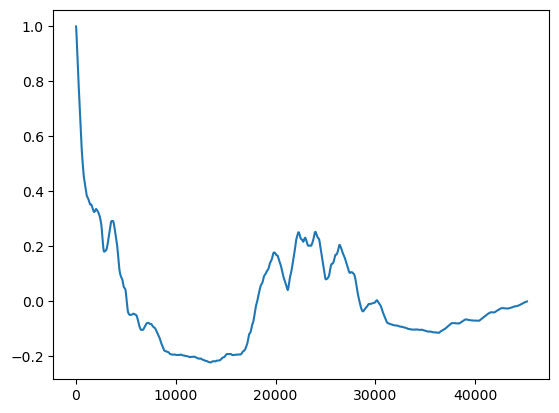

45189


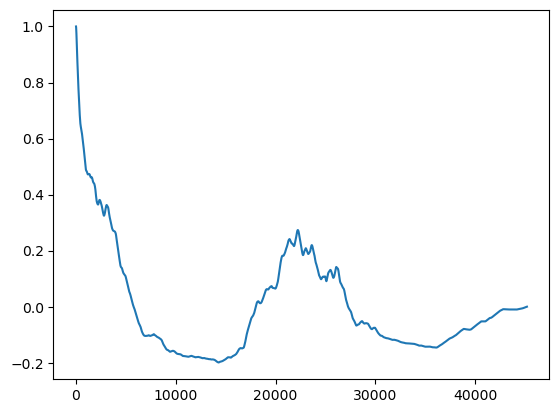

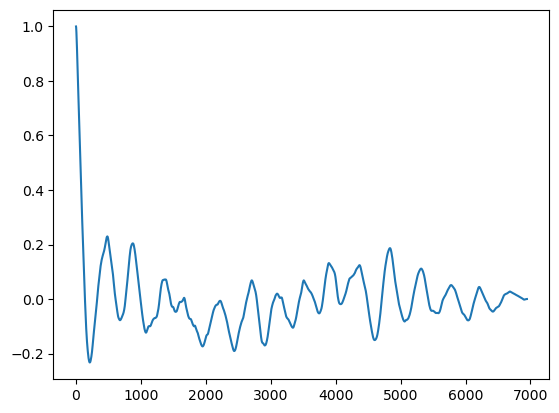

6946


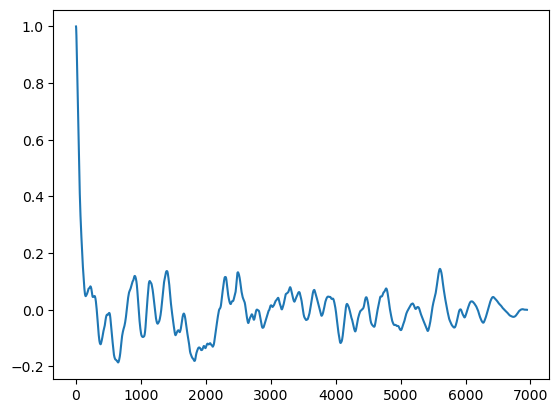

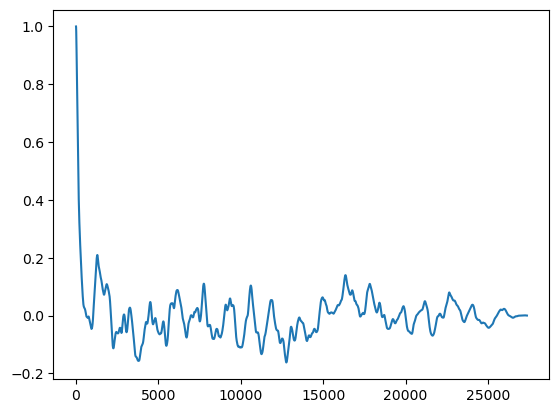

27369


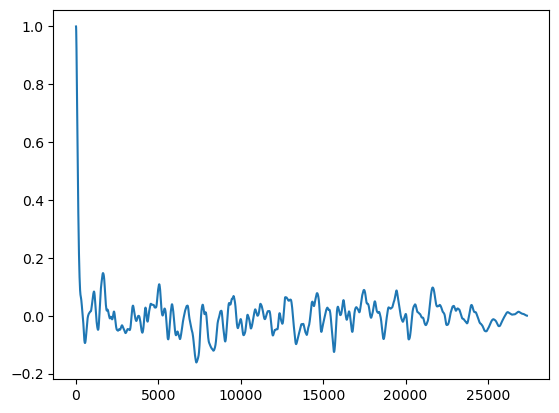

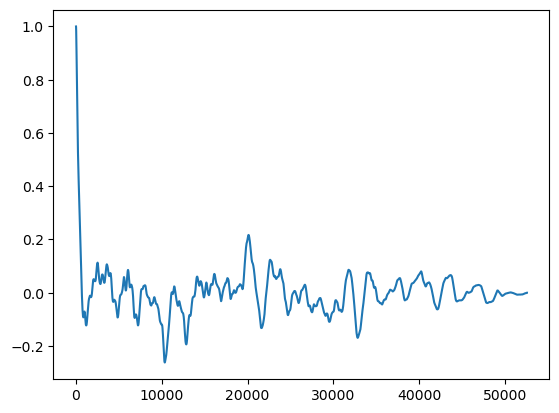

52562


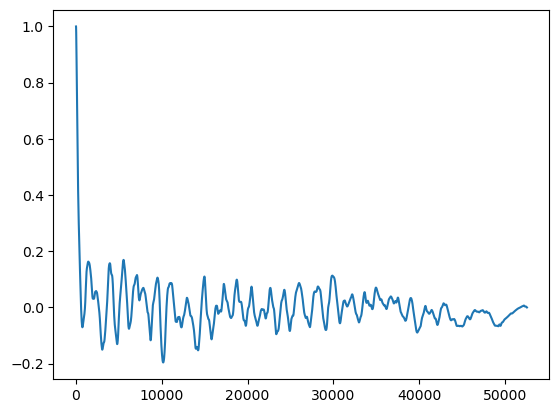

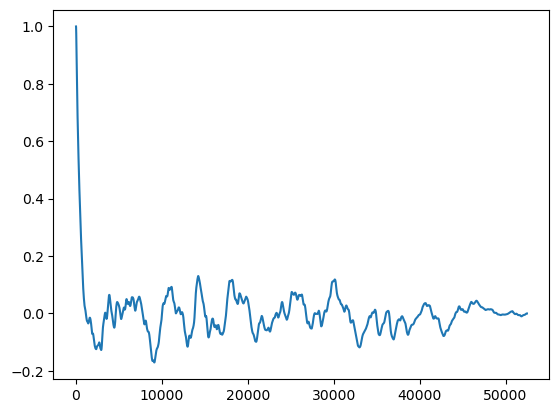

52485


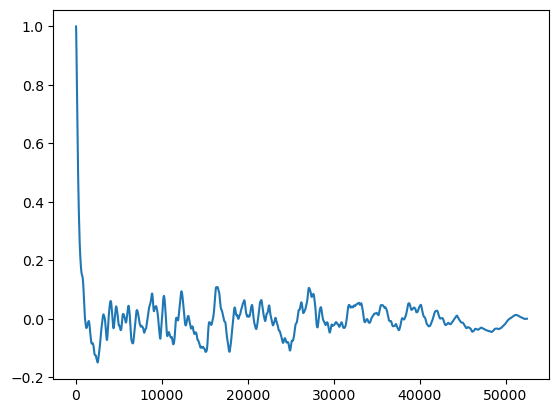

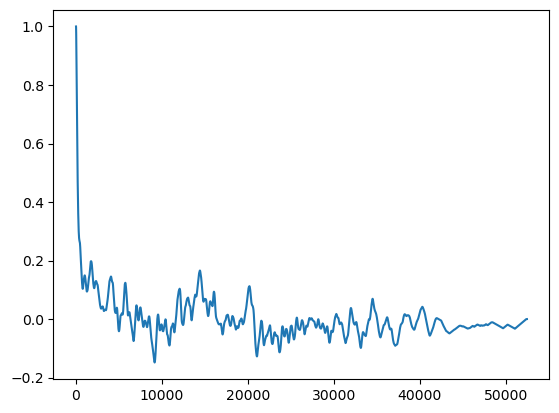

52450


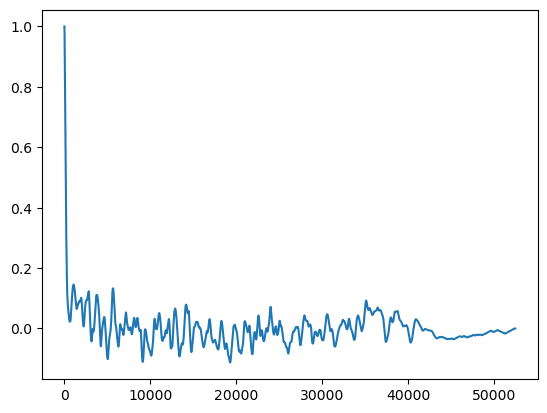

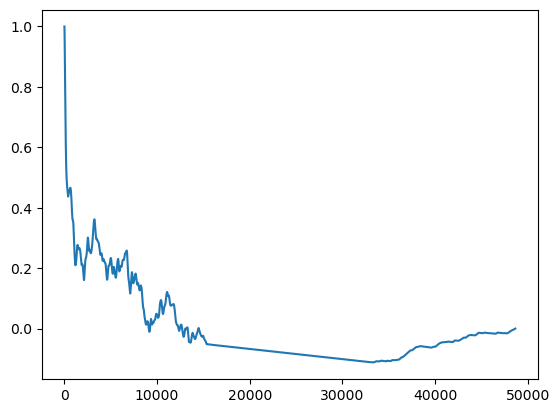

48644


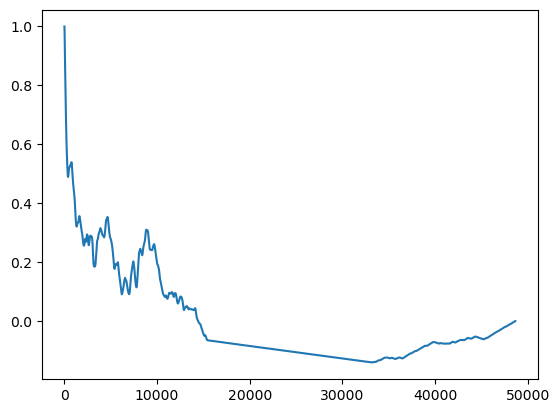

In [14]:
for i in dfs:
    # Delay (lag) range that we are interesting in
    lags = range(len(i))
    datax = i['x']
    acorrx = sm.tsa.acf(datax, nlags = len(lags)-1, fft=False)
    acorrx
    plt.figure()
    plt.plot(acorrx)
    plt.show()
    
    # Our data set 
    datay = i['y']
    print(len(datay))
    # Delay (lag) range that we are interesting in
    lags = range(len(datay))
    #''' Statsmodels '''

    acorry = sm.tsa.acf(datay, nlags = len(lags)-1, fft=False)
    plt.figure()
    plt.plot(acorry)
    plt.show()

### снова черновик: рисуем скорости до сглаживания и после

In [61]:
x = df['x']
v3 = gaussian_filter1d(x, 3)
v5 = gaussian_filter1d(x, 5)
plt.plot(x, 'k', label='original data')
plt.plot(v3, '--', label='filtered, sigma=3')
plt.plot(v5, '--', label='filtered, sigma=5')
plt.legend()
plt.grid()
plt.show()

In [26]:
def addV(df):
    vx = []
    vy = []
    v = []
    for i in range(len(df)):
        if i == 0:
            vx.append(0)
            vy.append(0)
            v.append(0)
        else:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            dt = df['time'][i]-df['time'][i-1]
            vvx = dx/dt
            vvy = dy/dt
            vv = pow(pow(vvx, 2) + pow(vvy, 2), 0.5)
            vx.append(vvx)
            vy.append(vvy)
            v.append(vv)
    df.insert(3, "Vx", vx)
    df.insert(4, "Vy", vy)
    df.insert(5, "V", v)
    return(df)

In [27]:
df = openFile('Trace_7.txt')
df = addV(df)

In [28]:
v = df['V']
v3 = gaussian_filter1d(v, 3)
v5 = gaussian_filter1d(v, 5)
plt.figure()
plt.plot(v, 'k', label='original data')
plt.plot(v3, '--', label='filtered, sigma=3')
plt.plot(v5, '--', label='filtered, sigma=5')
plt.legend()
plt.grid()
plt.show()